# Predicting house price using machine learning

We're going to take the following approach:
1. Problem Definition
2. Getting Data
3. Domain Analysis
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing
6. Model Building
7. Evaluating the Model

## 1. Problem Definition
The Housing dataset was compiled by Dean De Cock which is an incredible alternative and an exhaustive dataset with modernized and expanded version of the Boston Housing dataset. The target is to predict the property sales however this requires extensive feature engineering to achieve the same. 

for that we have to :-  

- Task 1:- Prepare a complete data analysis report on the given data.

- Task 2:-a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.      
        b) Determine the relationship between the house features and how the price varies based on this.

- Task3:- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.


## 2. Getting Data
We are working with "The Ames Housing dataset" which was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. we can also find the dataset on 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [2]:
data = pd.read_csv('data.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

## 3. Domain Analysis
Here's a brief version of what we'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that we're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale



### Basic checks

In [3]:
data.shape

(1460, 81)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# data description of numerical values
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
# specify only numerical columns
numerical_columns = data.select_dtypes(include=["int64","float64"]).columns
numerical_columns = numerical_columns.drop('Id')
print(numerical_columns)
print(f"The Number of Numerical Columns = {len(numerical_columns)}")

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The Number of Numerical Columns = 37


In [9]:
categorical_columns = data.select_dtypes(include=["object"]).columns
print(categorical_columns)
print(f"The Number of Categorical Columns = {len(categorical_columns)}")

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
The Number of Categorical Columns = 43


In [10]:
for i in categorical_columns:
    print(f"{i} --> {data[i].unique()}\n")
    print(data[i].value_counts())
    print("*******************************")


MSZoning --> ['RL' 'RM' 'C (all)' 'FV' 'RH']

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
*******************************
Street --> ['Pave' 'Grvl']

Street
Pave    1454
Grvl       6
Name: count, dtype: int64
*******************************
Alley --> [nan 'Grvl' 'Pave']

Alley
Grvl    50
Pave    41
Name: count, dtype: int64
*******************************
LotShape --> ['Reg' 'IR1' 'IR2' 'IR3']

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
*******************************
LandContour --> ['Lvl' 'Bnk' 'Low' 'HLS']

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
*******************************
Utilities --> ['AllPub' 'NoSeWa']

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
*******************************
LotConfig --> ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2        

In [11]:
# data description of categorical values
data.describe(include='O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [12]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## 4. Exploratory Data Analysis (EDA)

We have to analyze into three ways metioned below
- Univariate
- Bivariate
- Miltivariate

### Univariate
here we are analyzing each single column 
- for numerical column we'll use histplot
- for categorical column we'll use countplot

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:13 -> (00:00 left)



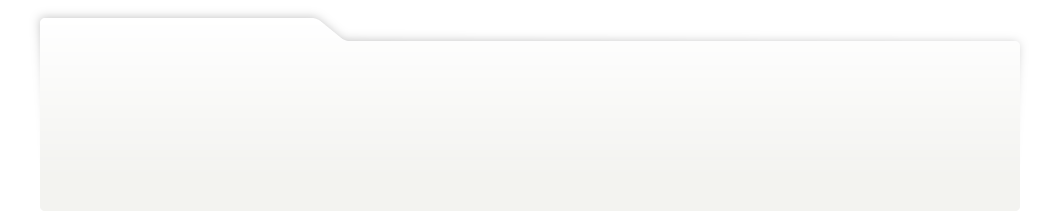
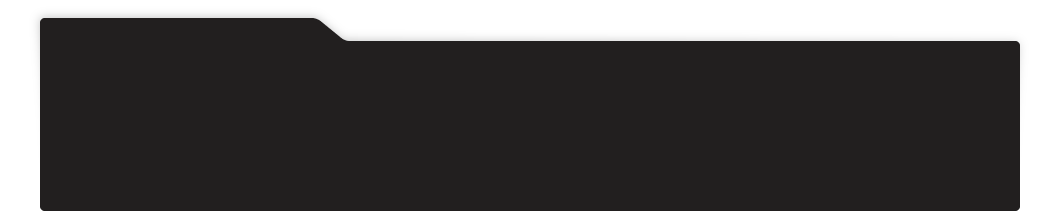
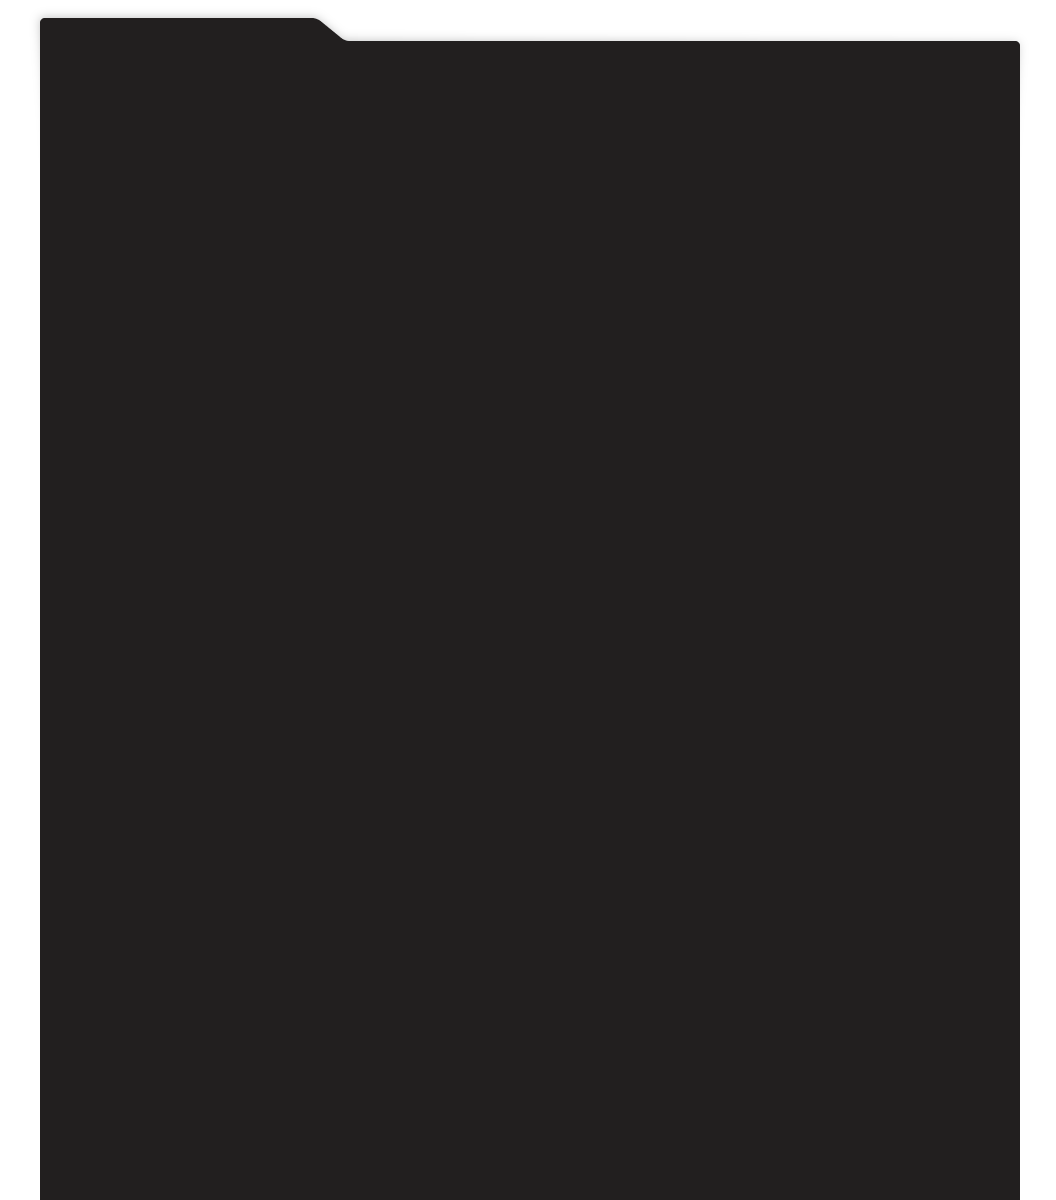
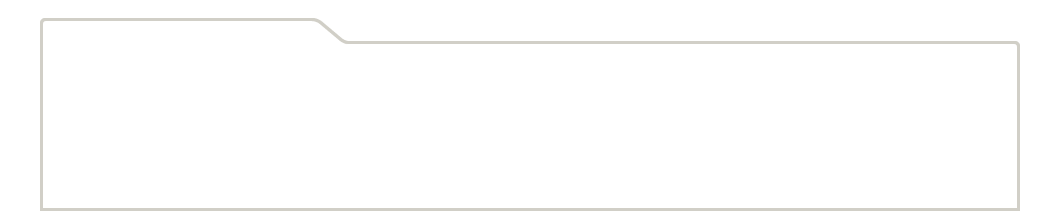
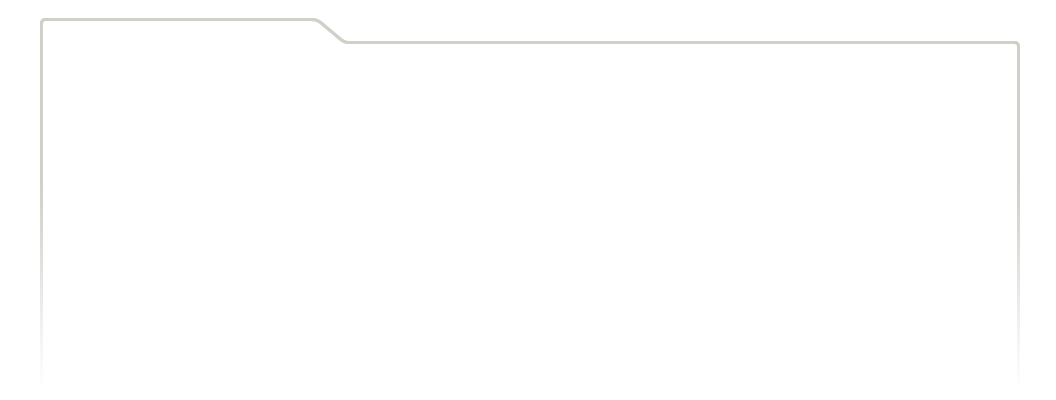
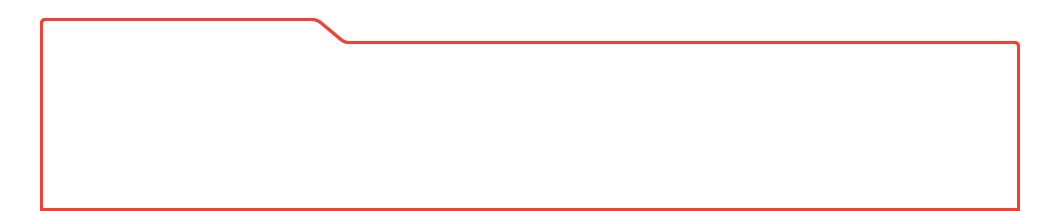
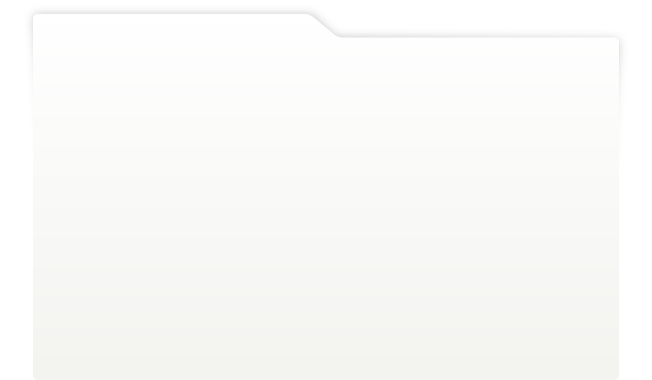
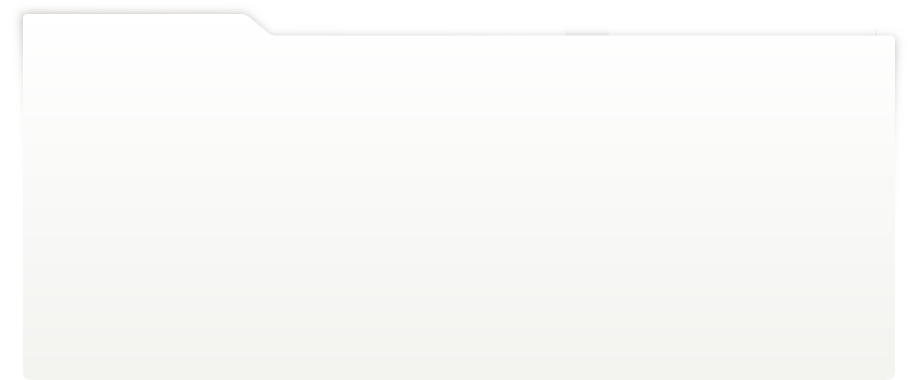
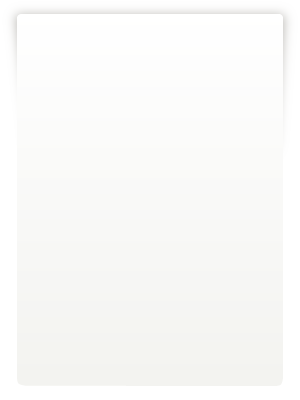
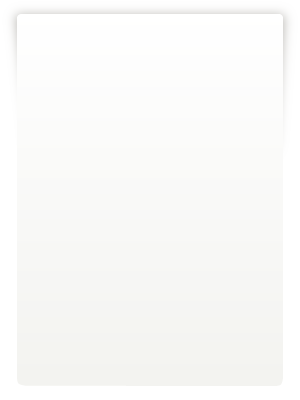
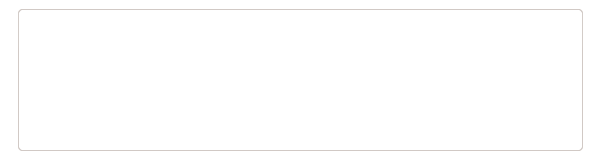
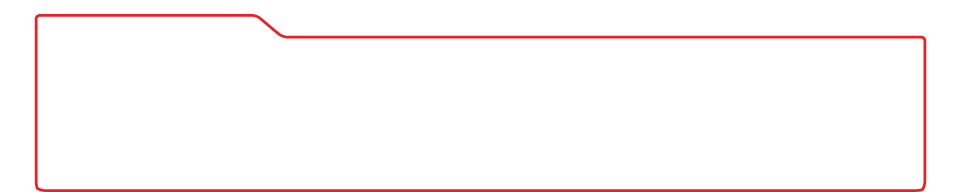
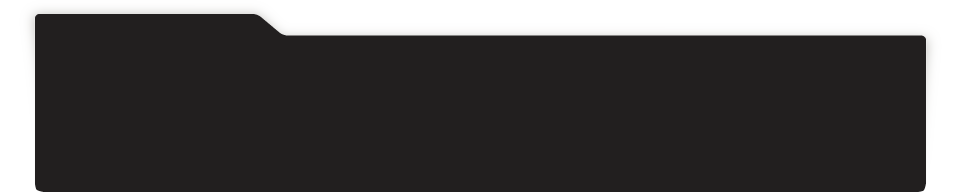
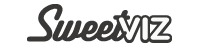
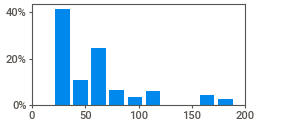
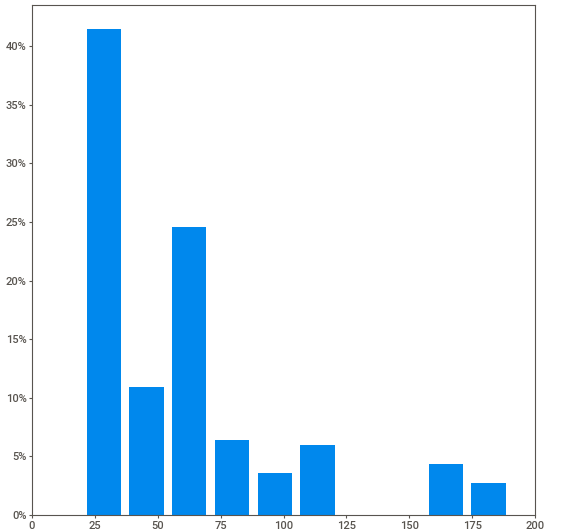
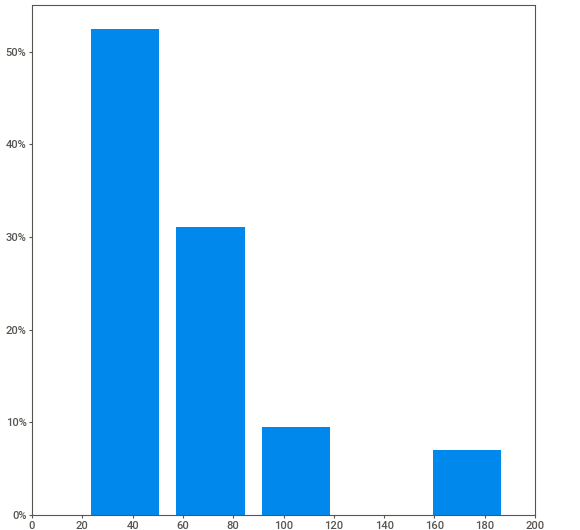
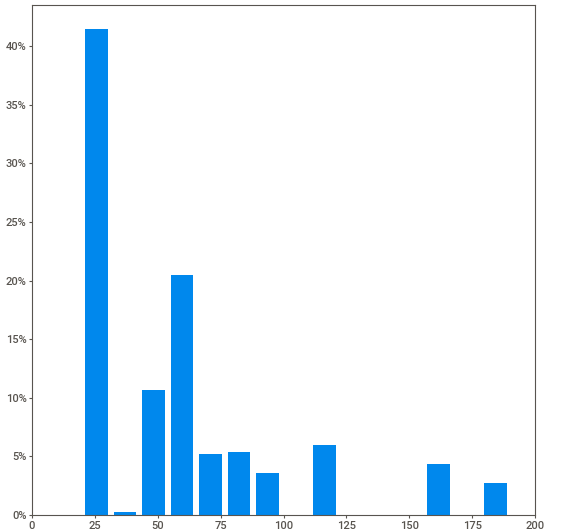
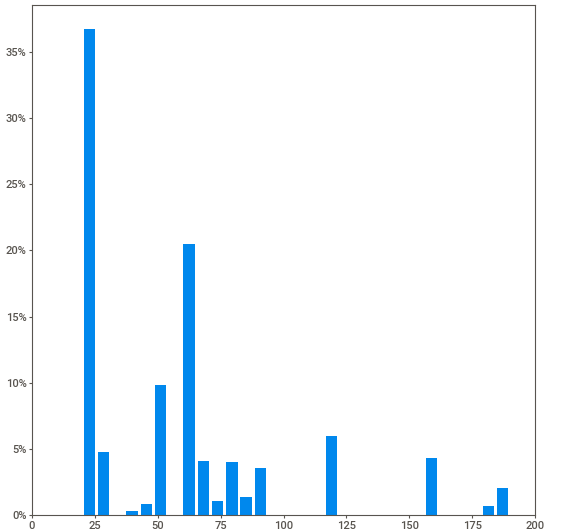
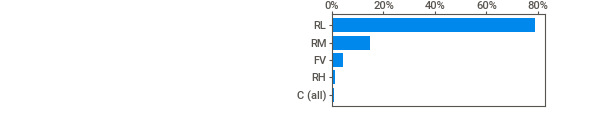
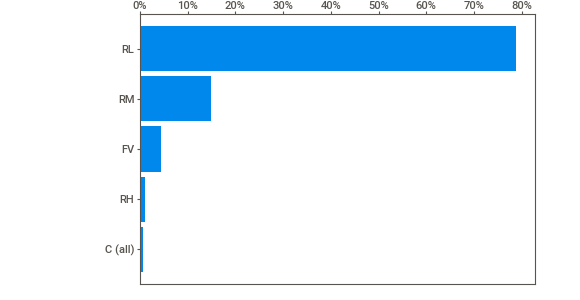
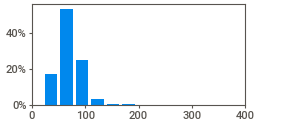
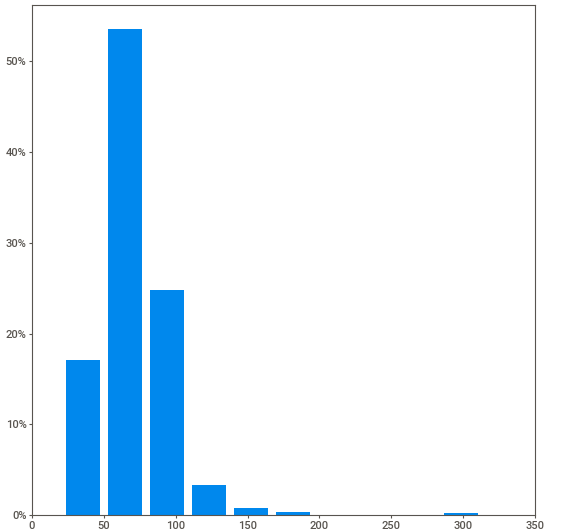
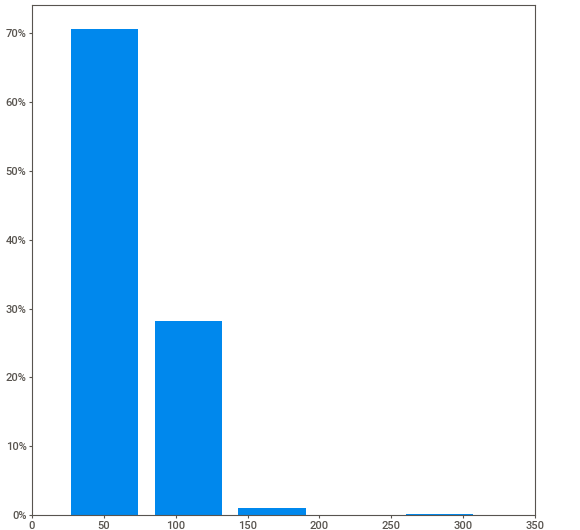
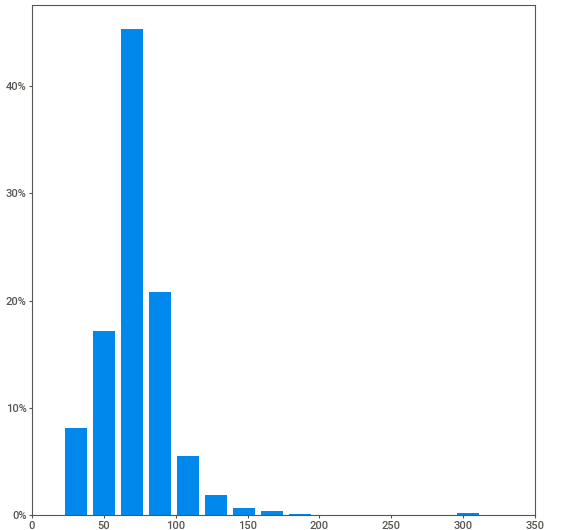
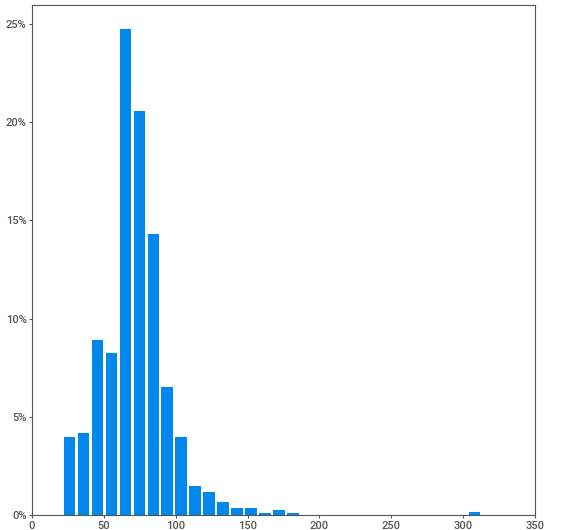
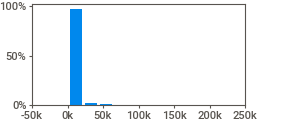
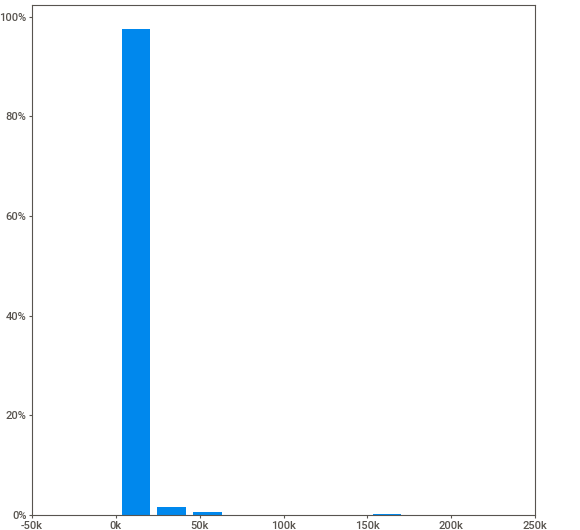
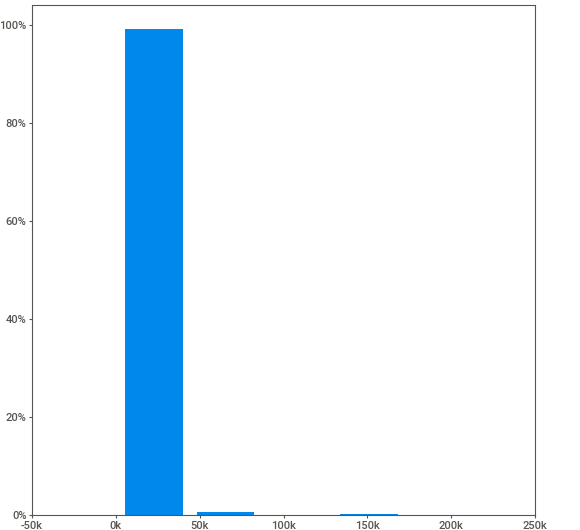
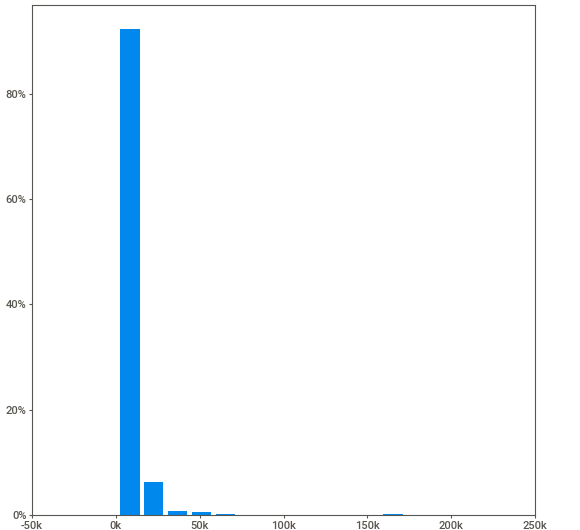
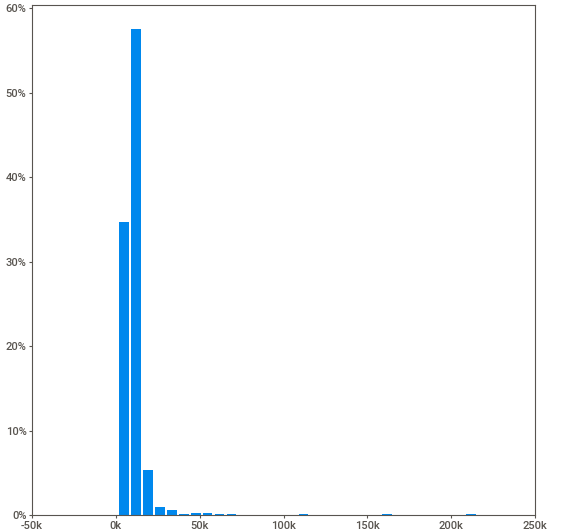
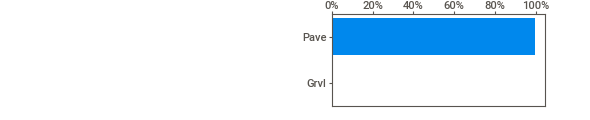
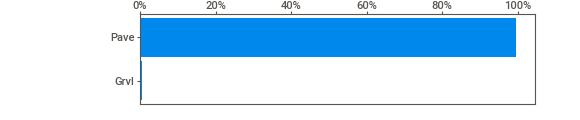
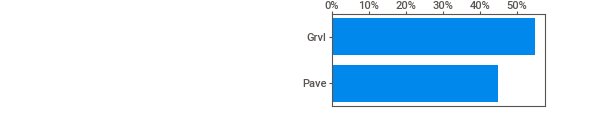
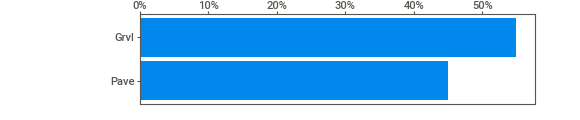
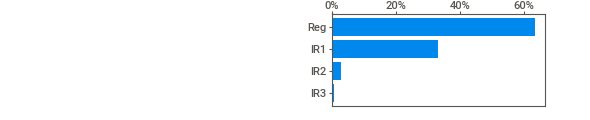
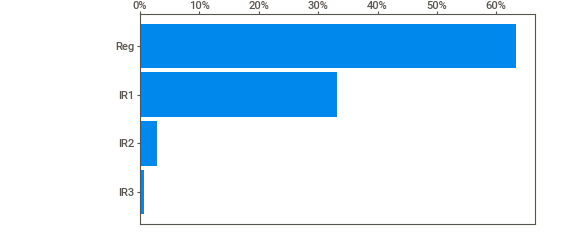
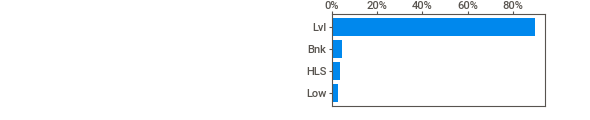
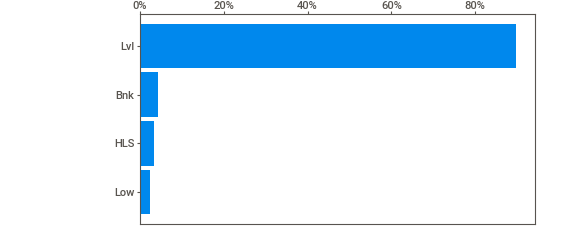
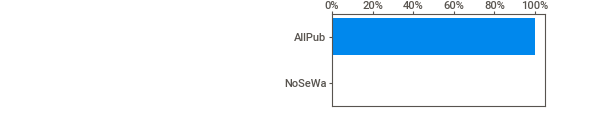
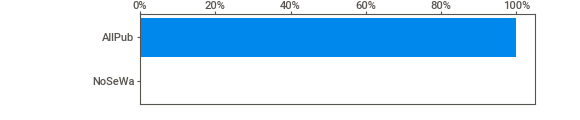
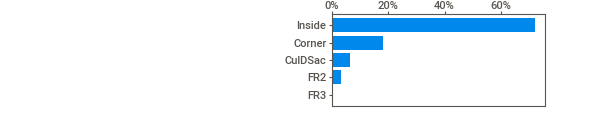
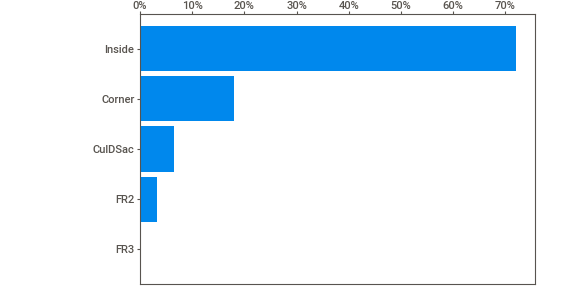
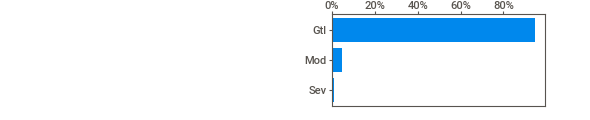
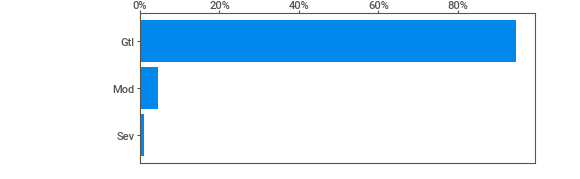
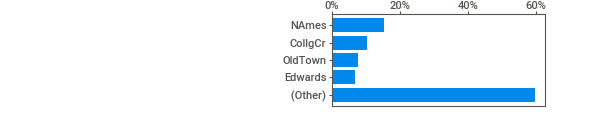
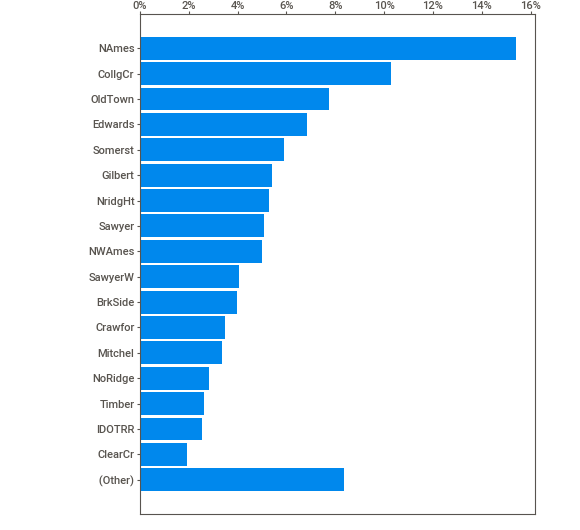
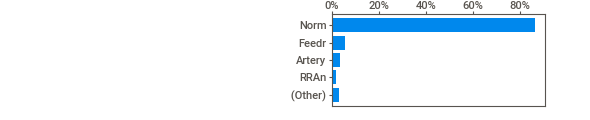
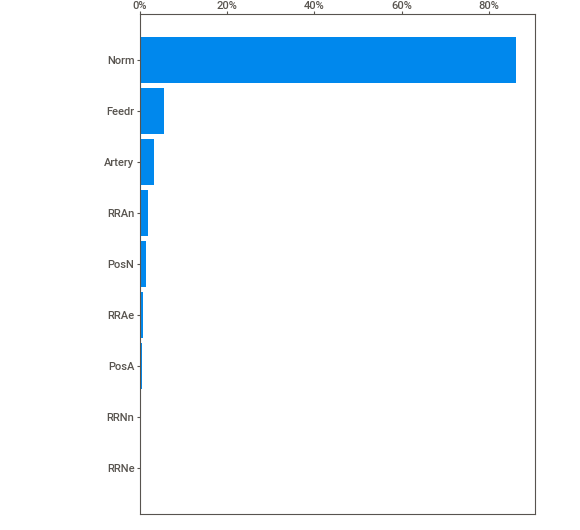
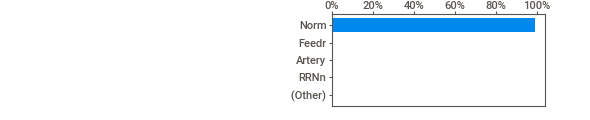
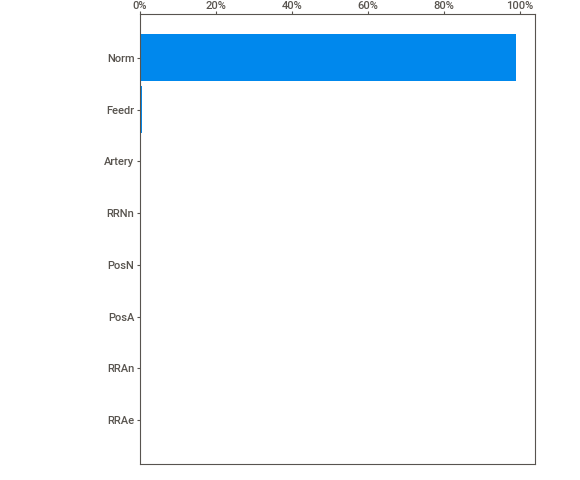
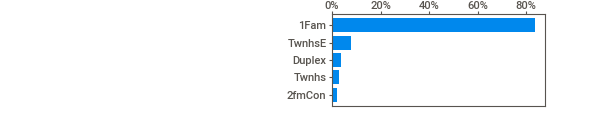
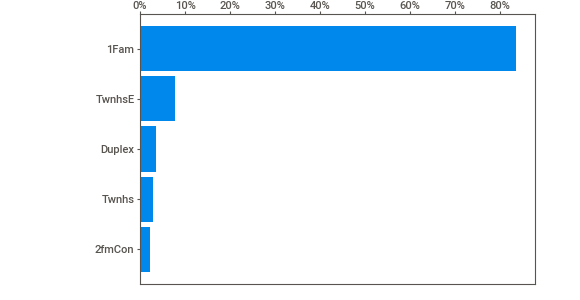
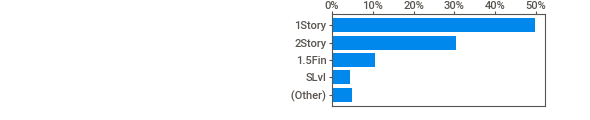
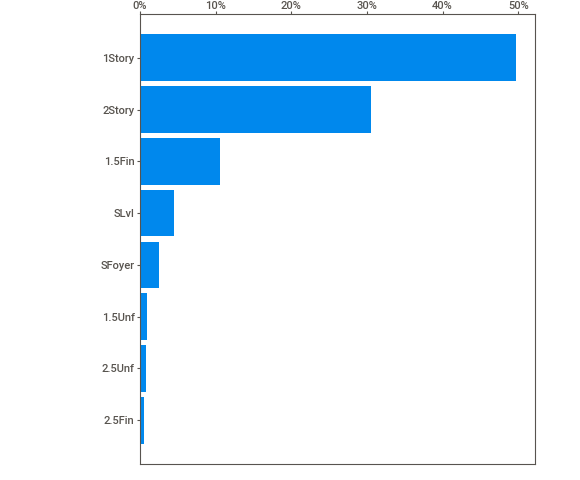
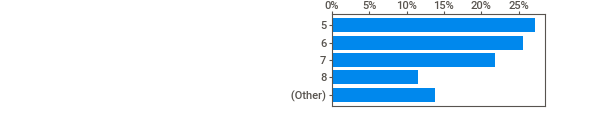
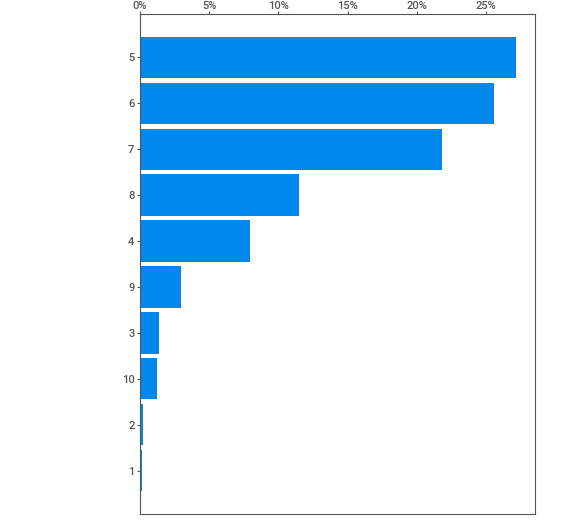
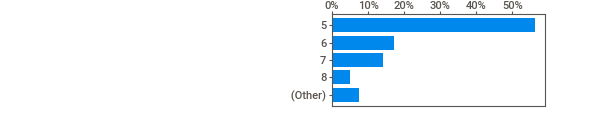
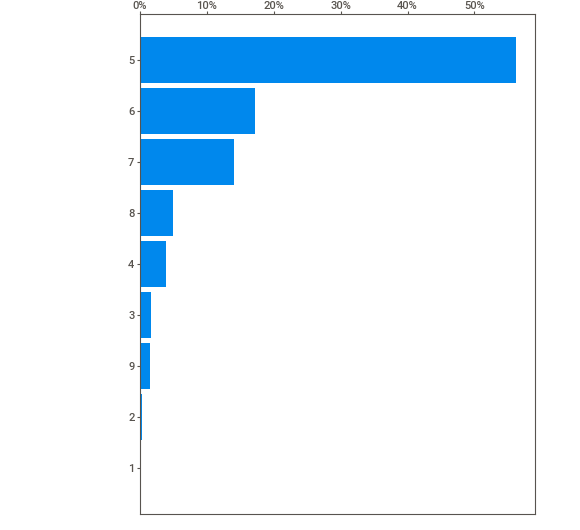
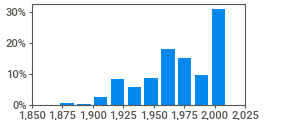
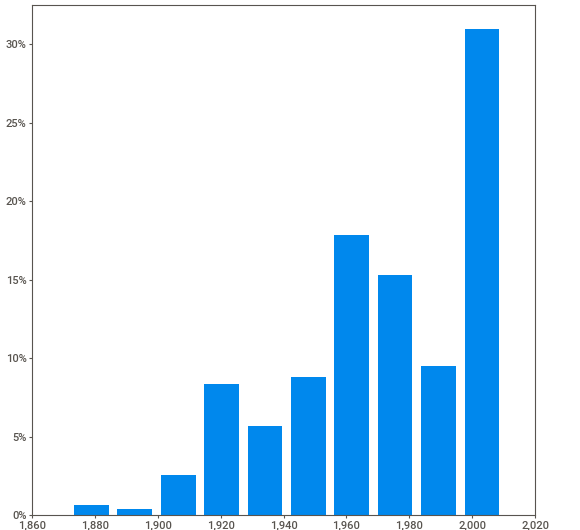
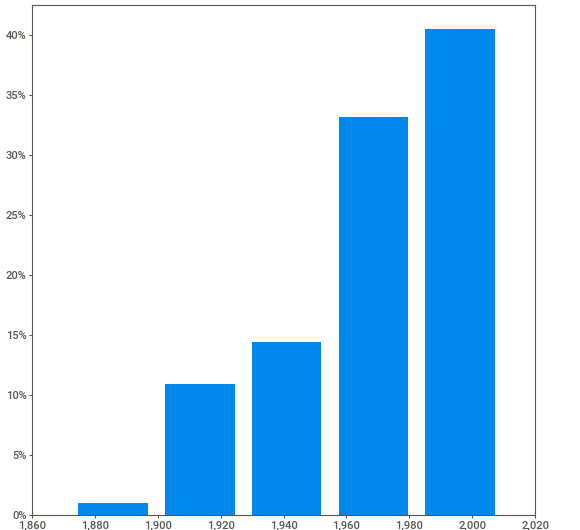
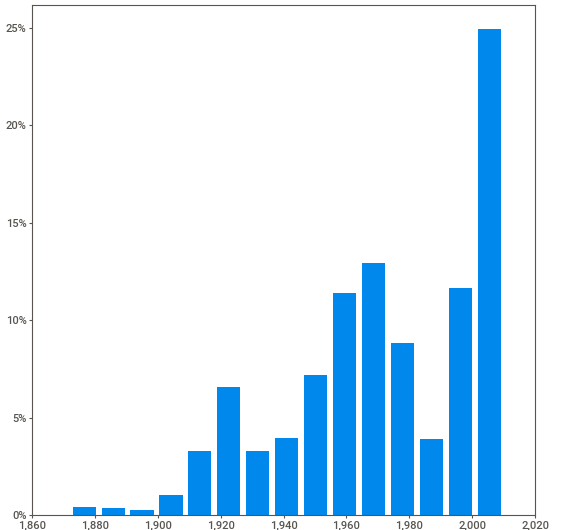
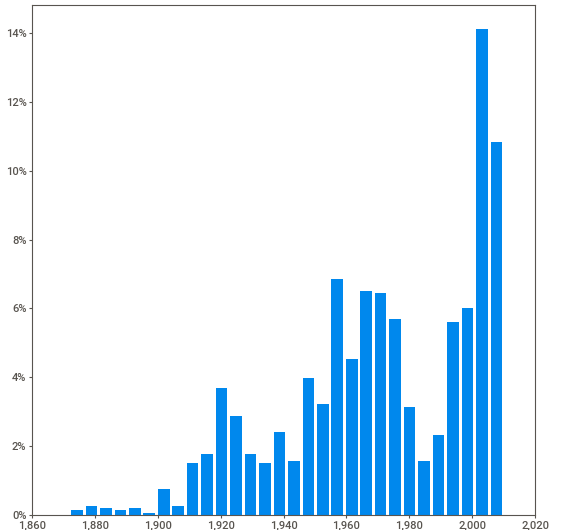
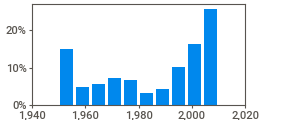
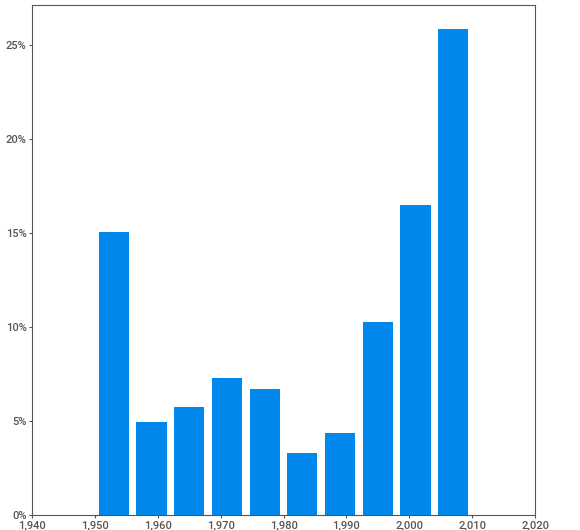
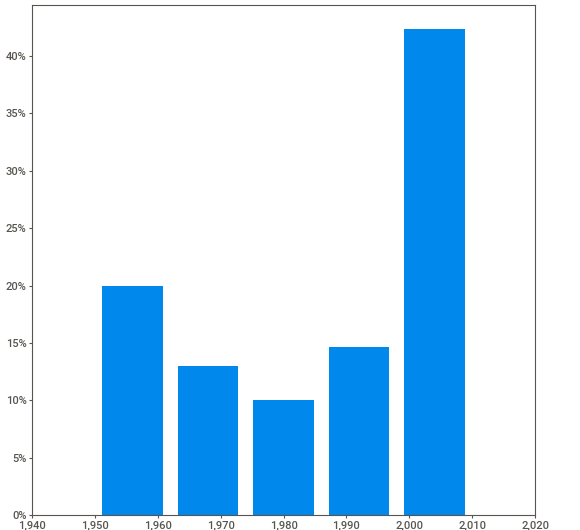
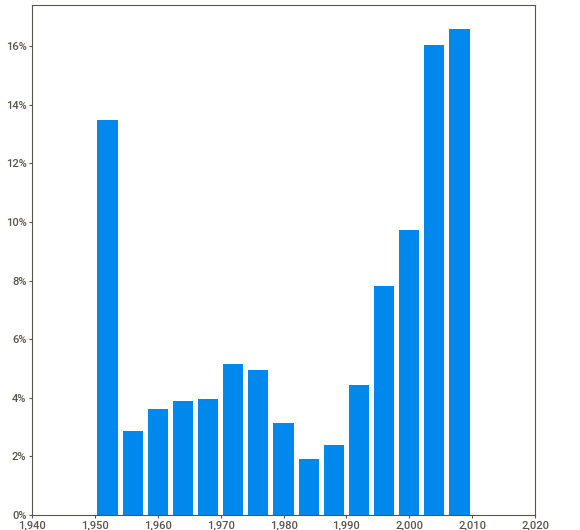
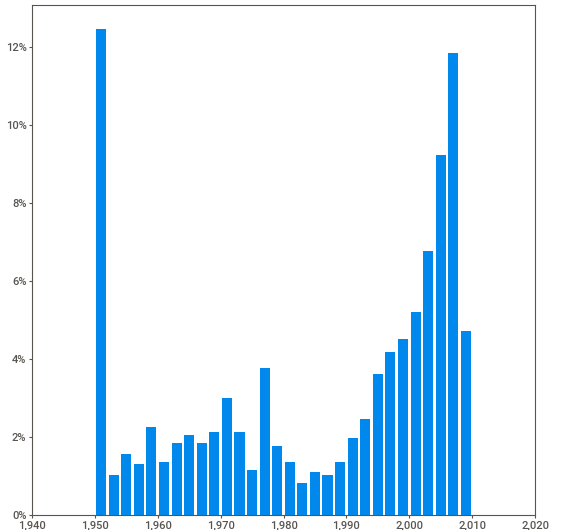
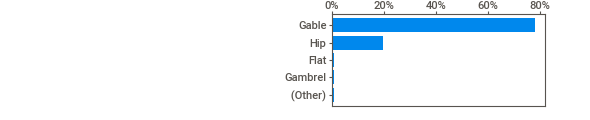
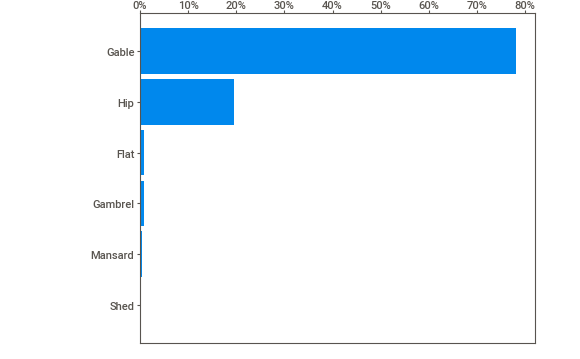
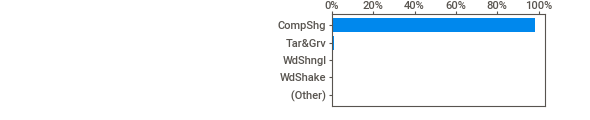
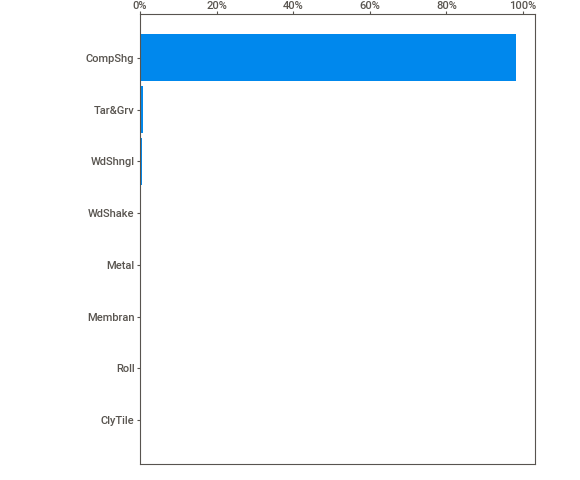
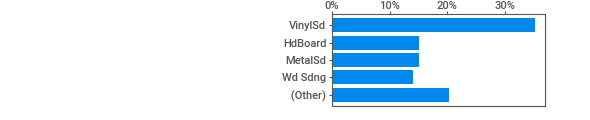
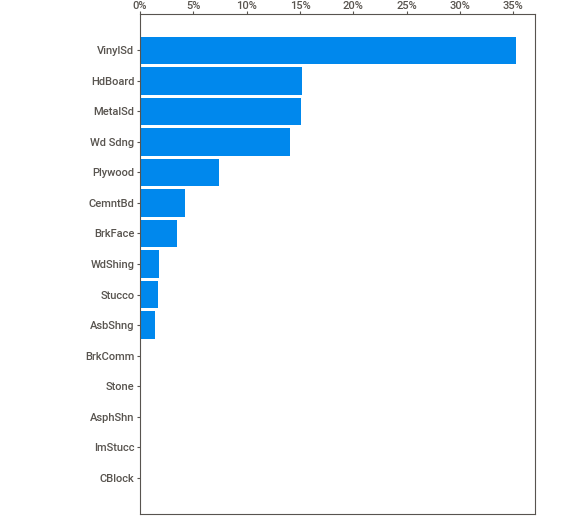
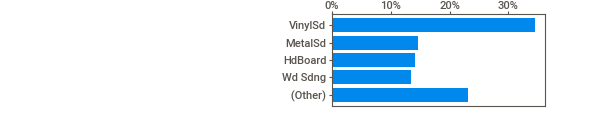
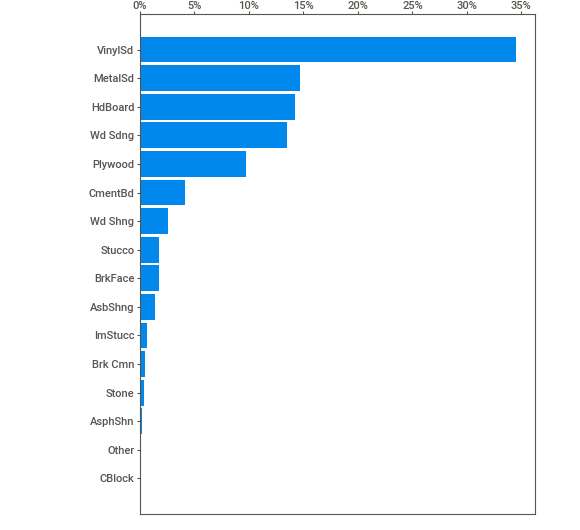
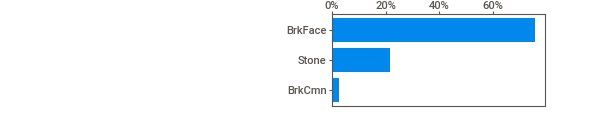
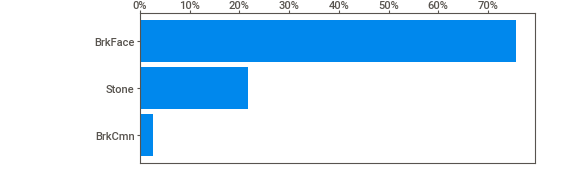
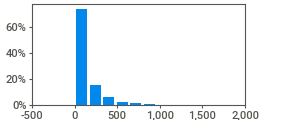
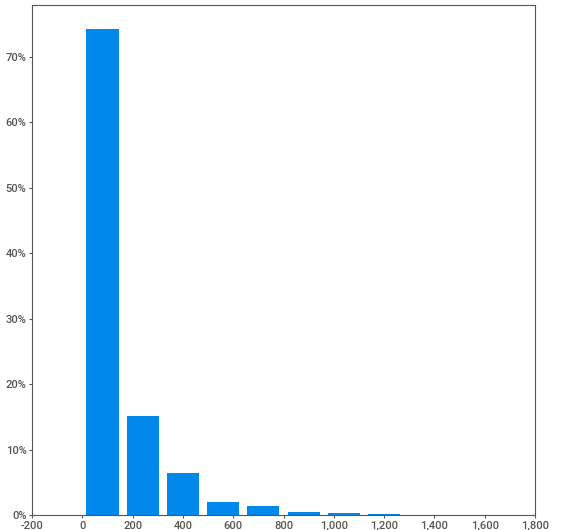
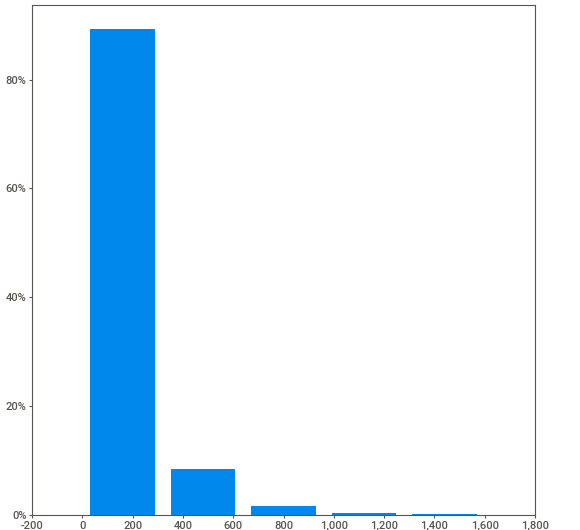
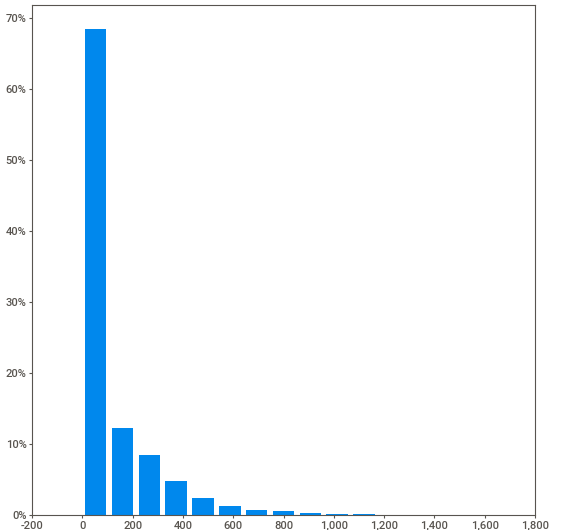
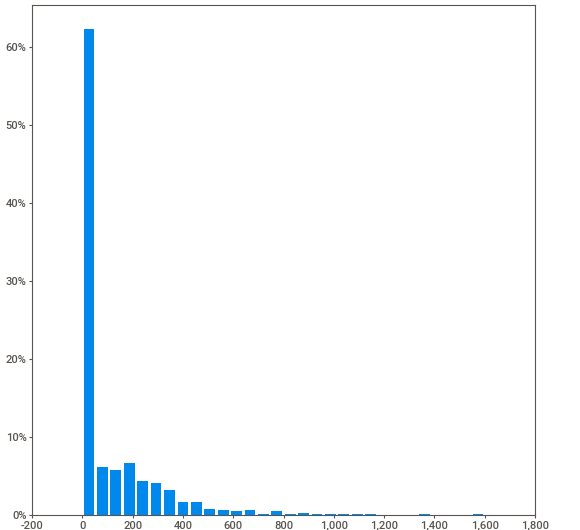
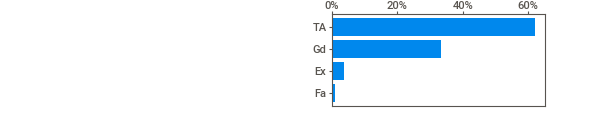
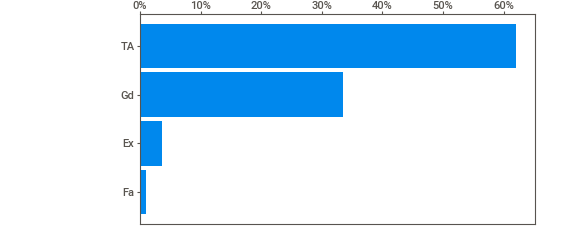
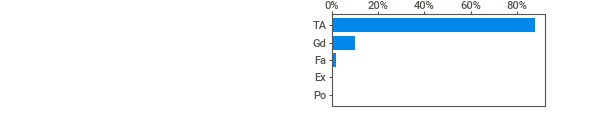
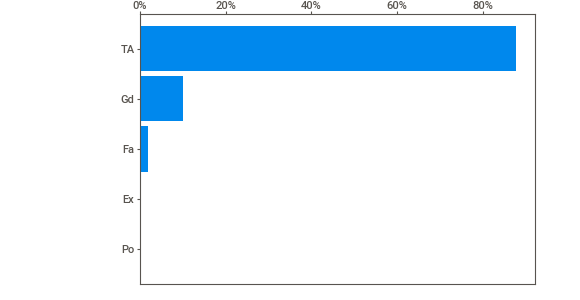
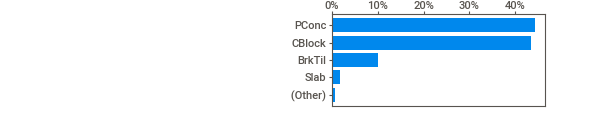
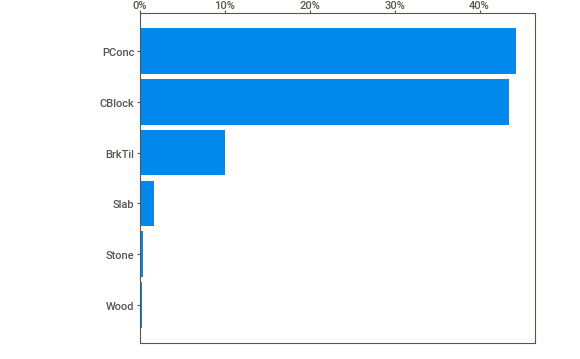
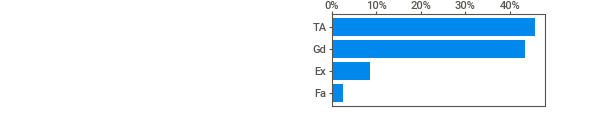
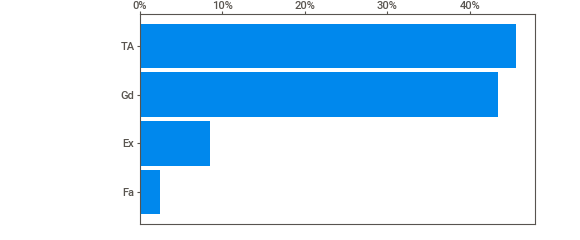
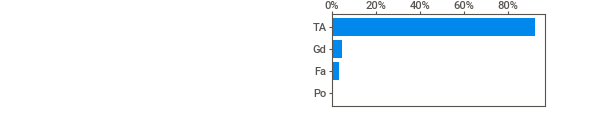
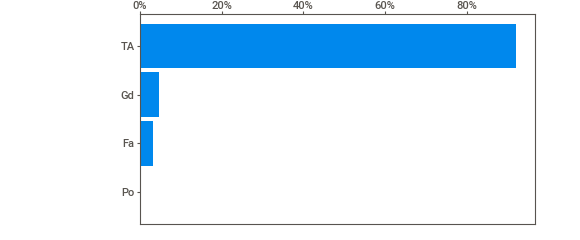
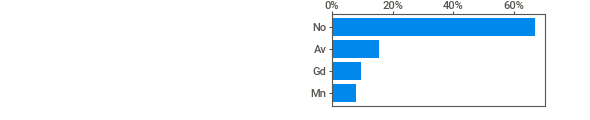
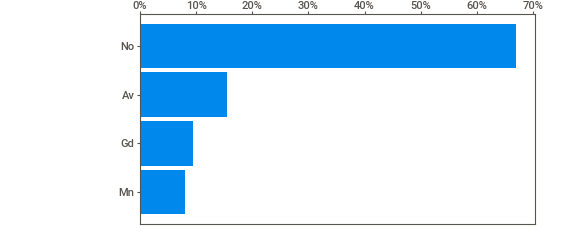
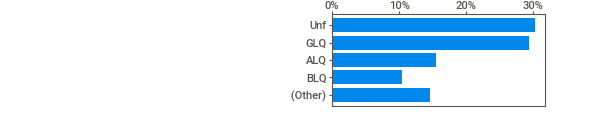
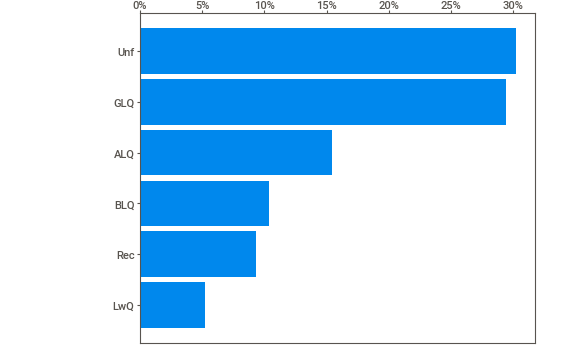
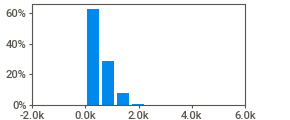
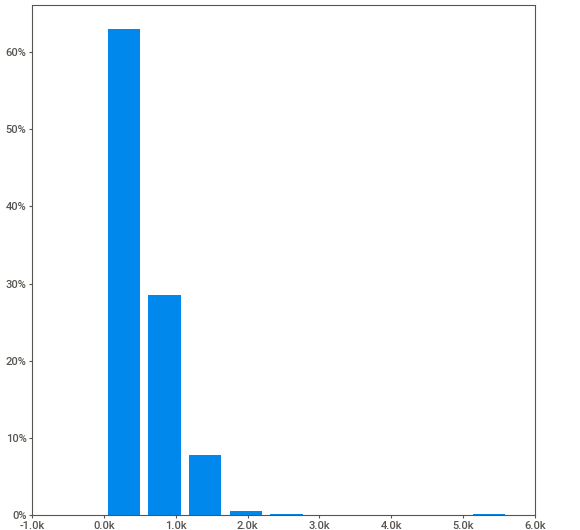
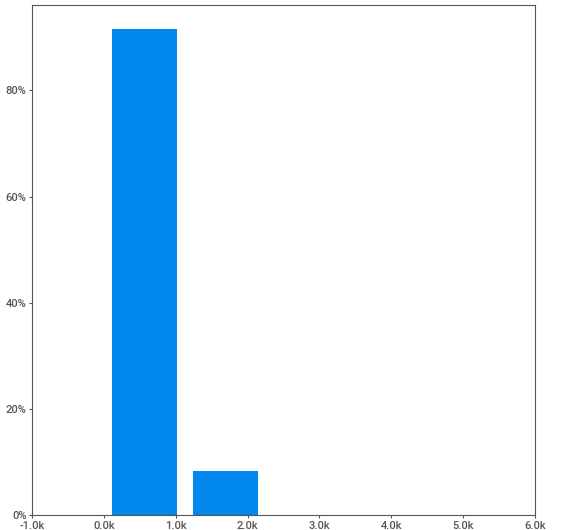
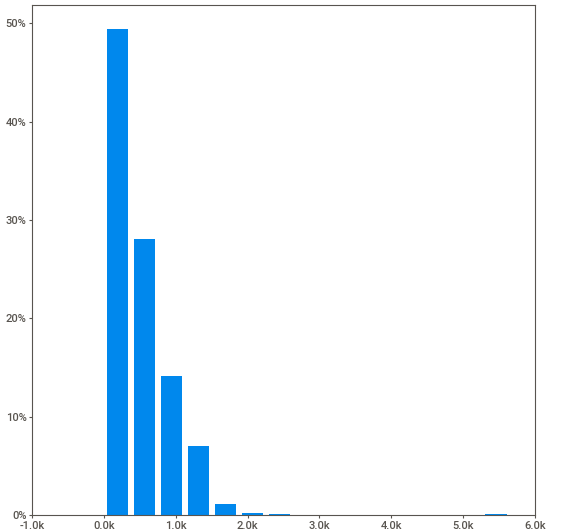
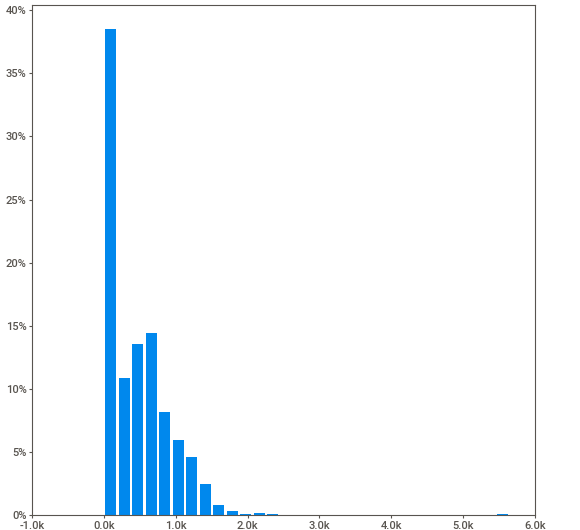
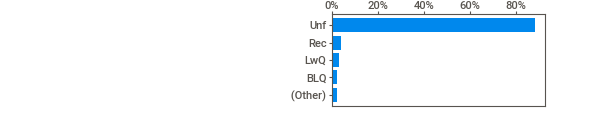
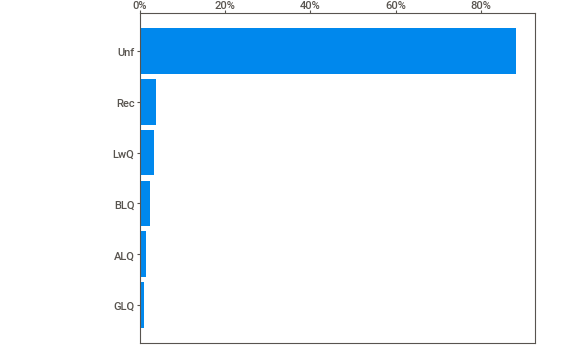
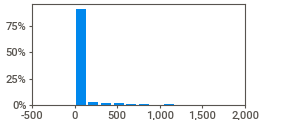
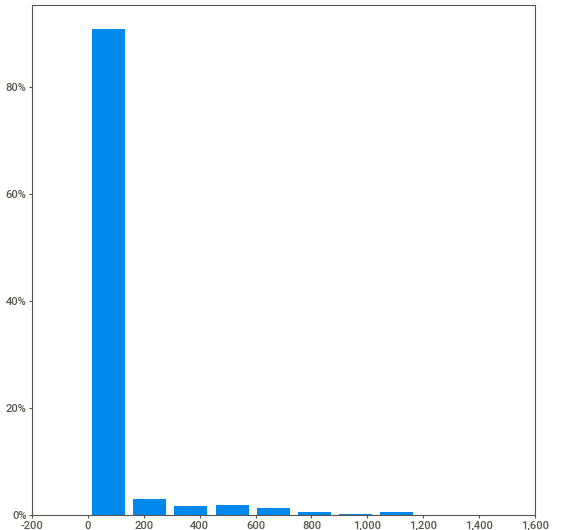
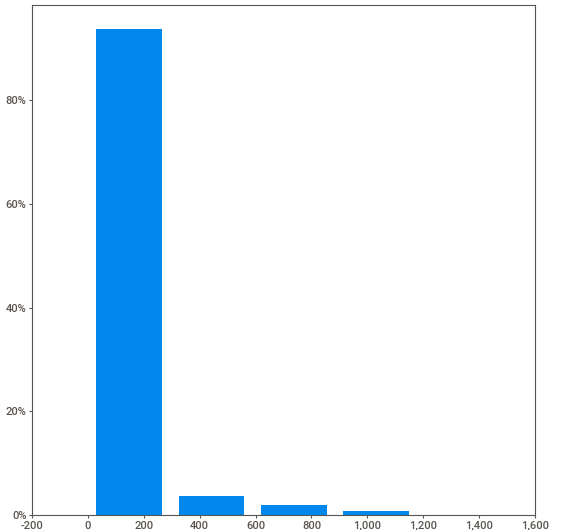
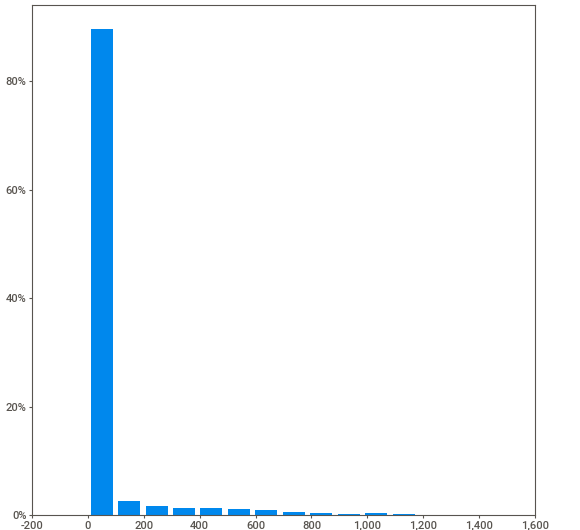
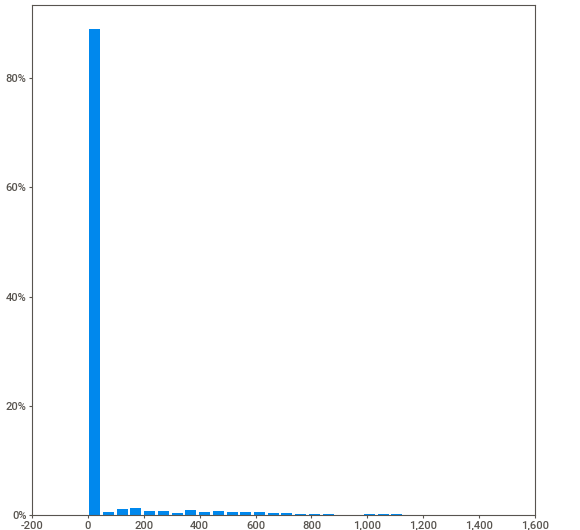
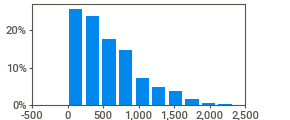
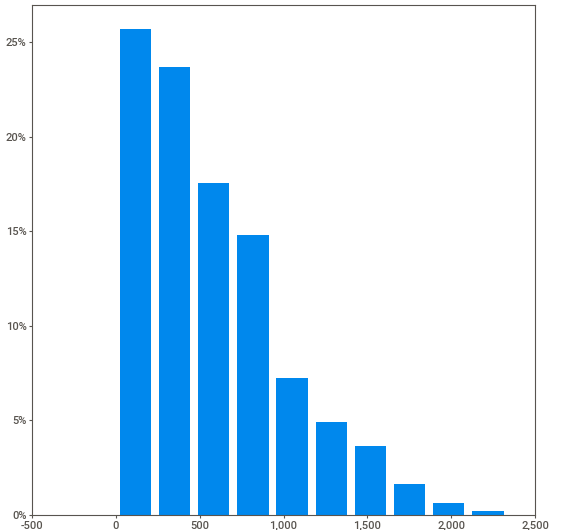
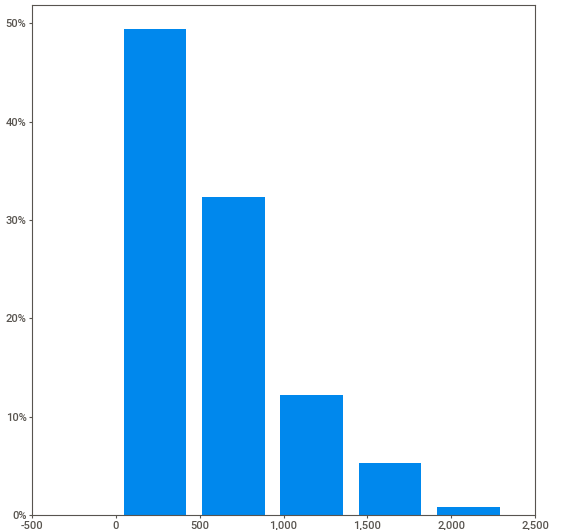
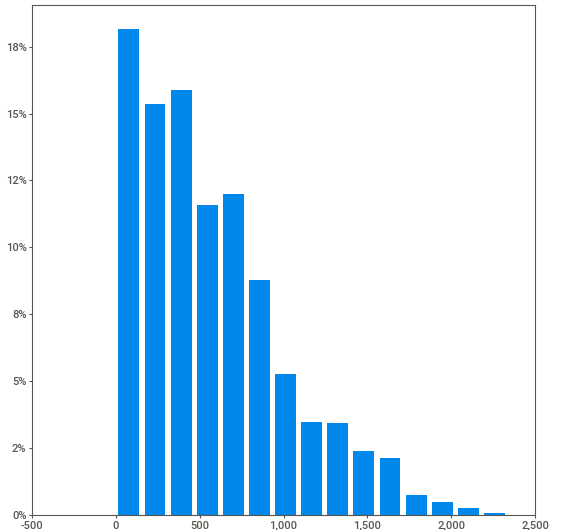
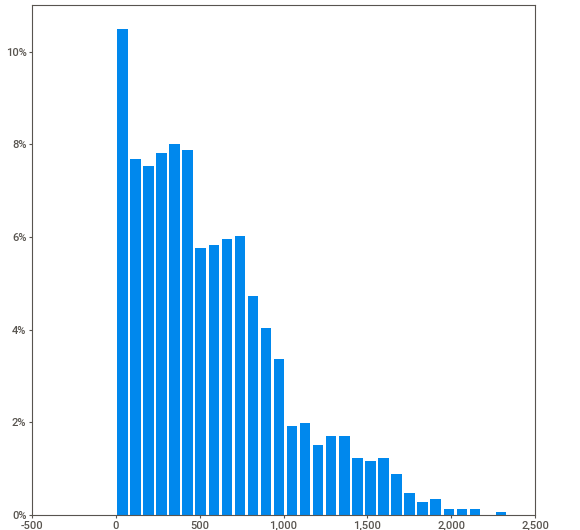
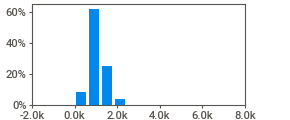
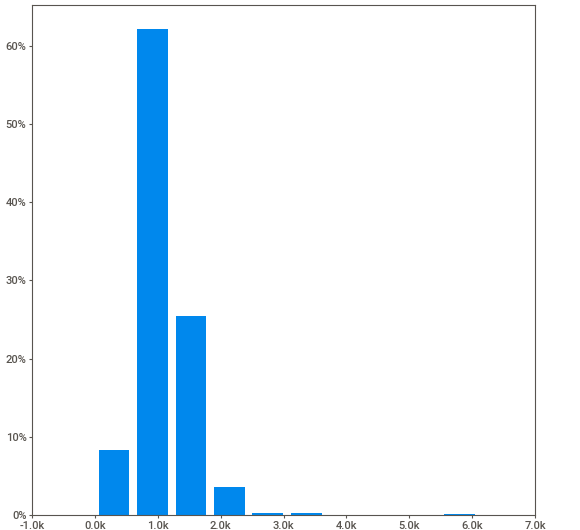
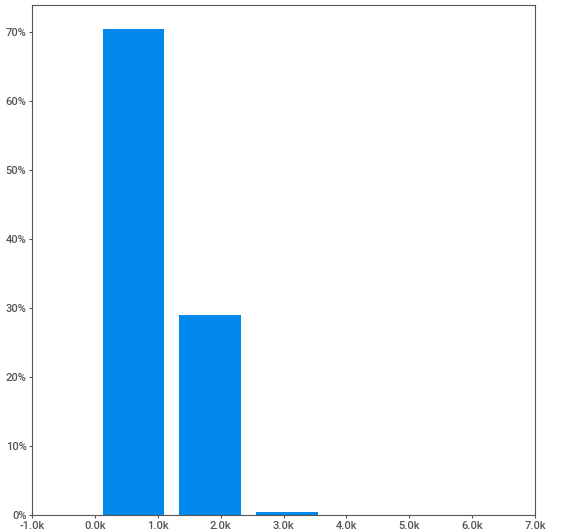
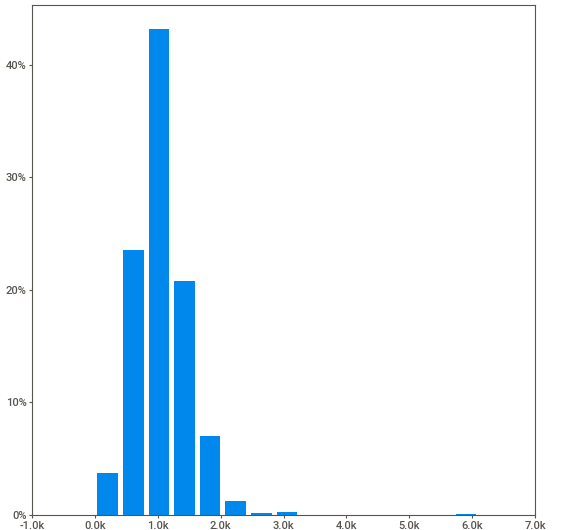
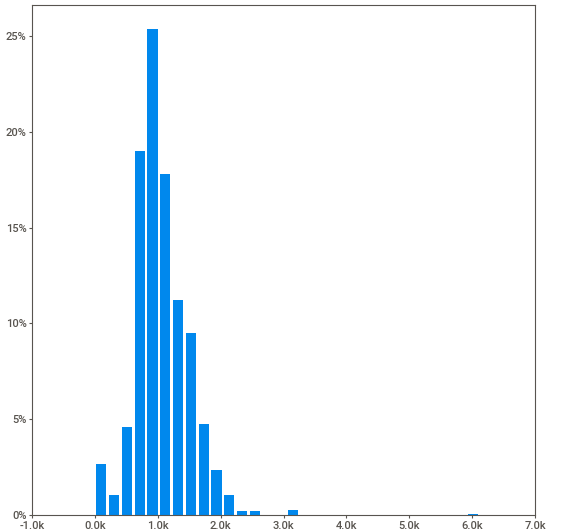
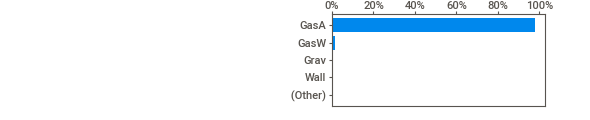
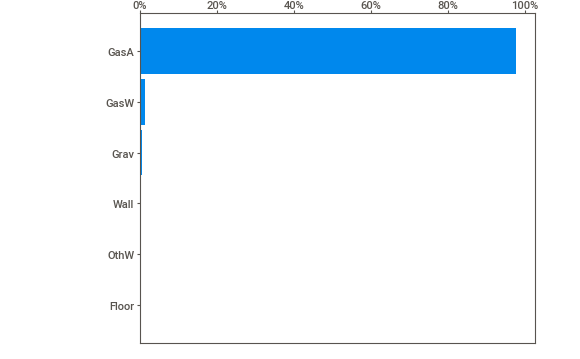
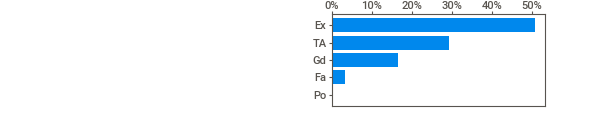
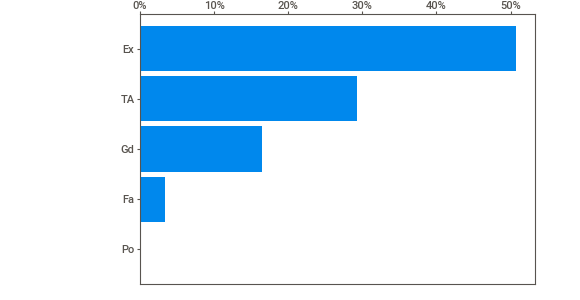
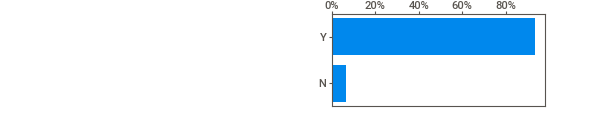
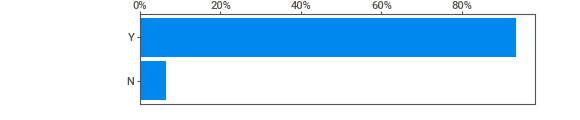
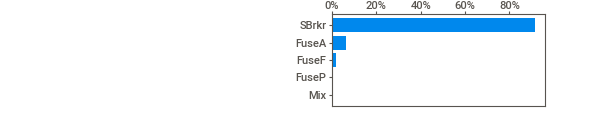
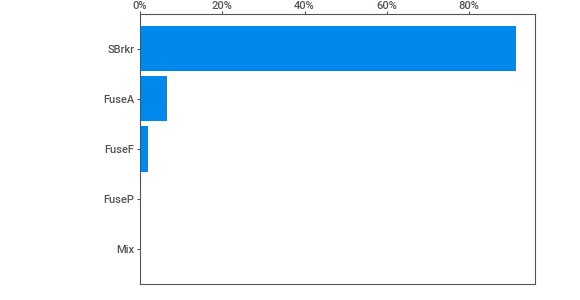
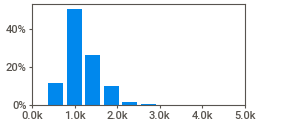
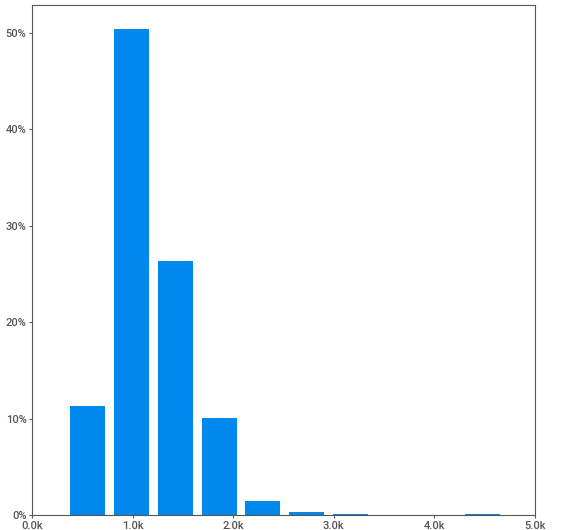
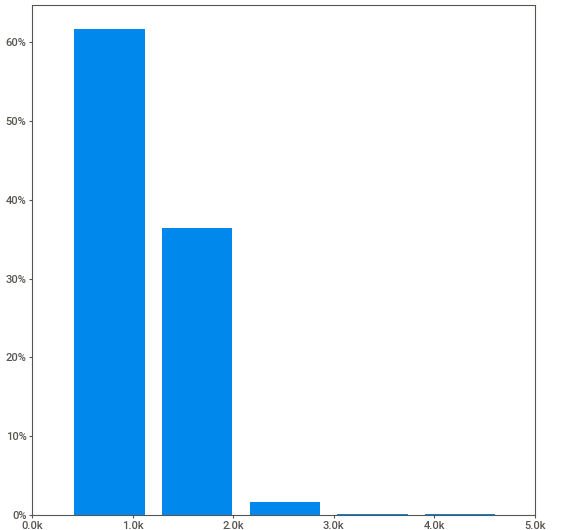
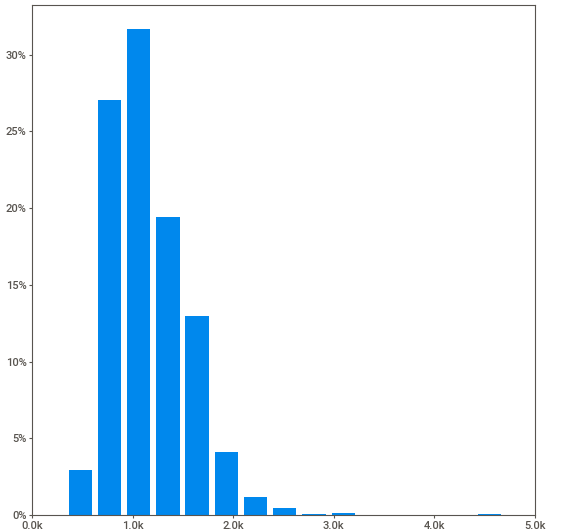
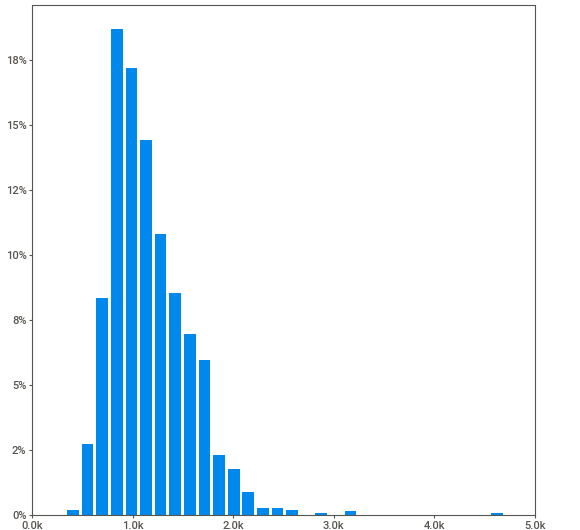
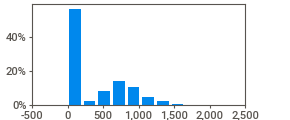
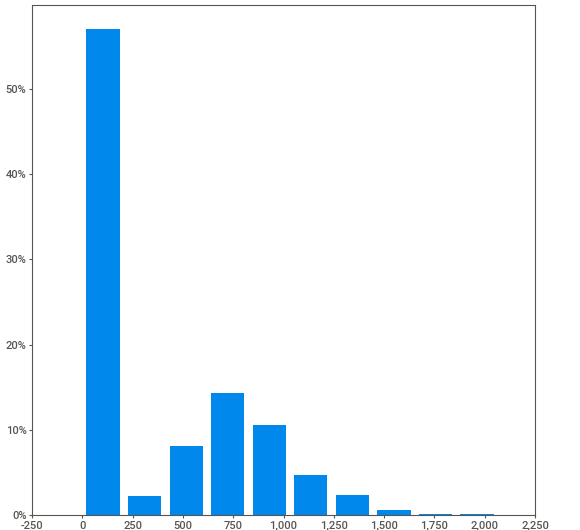
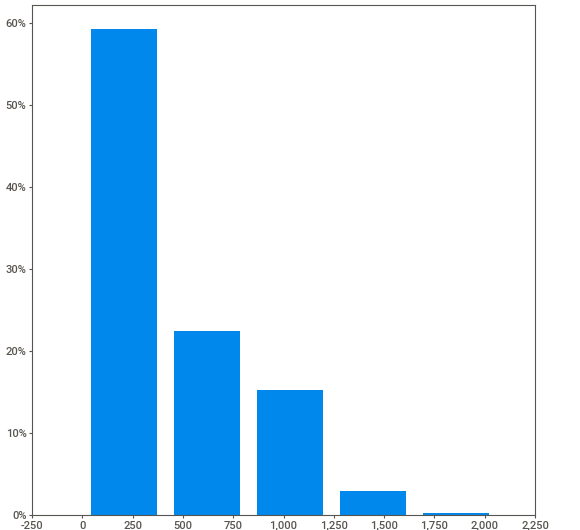
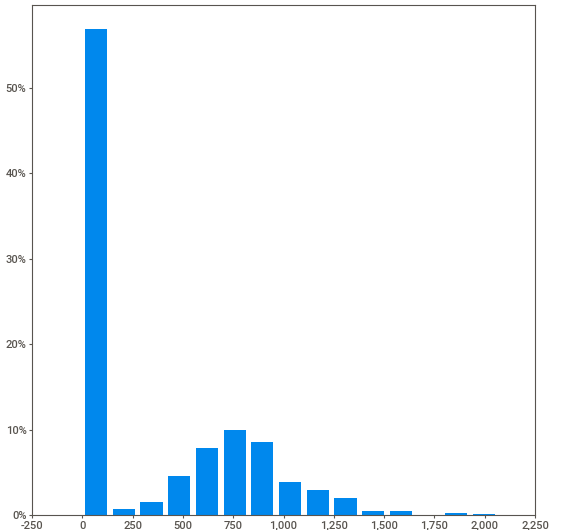
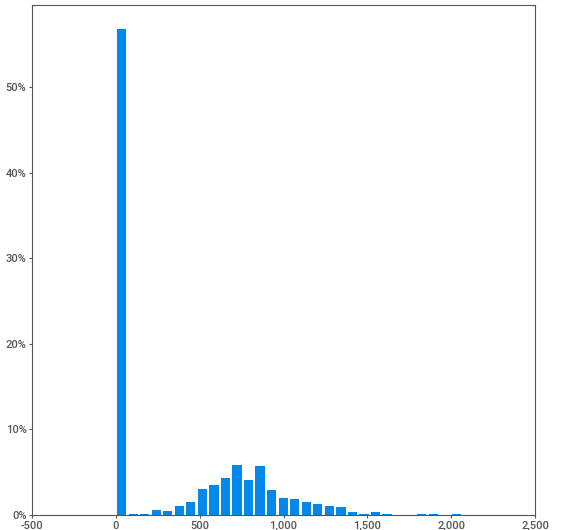
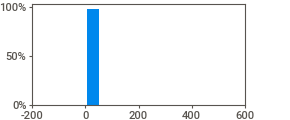
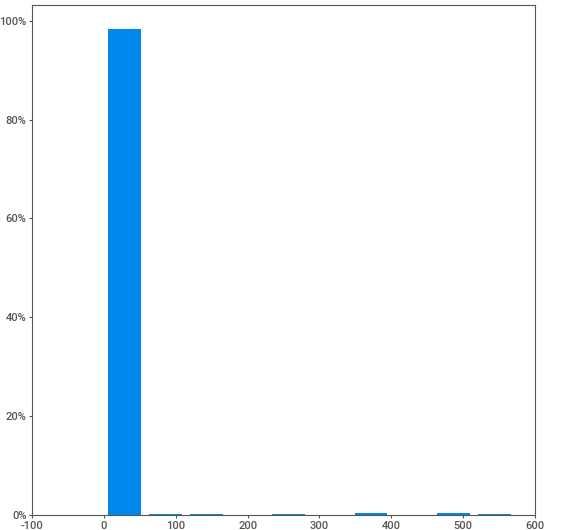
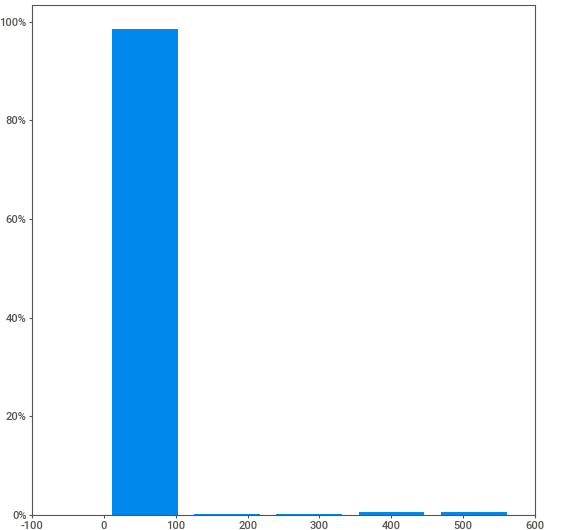
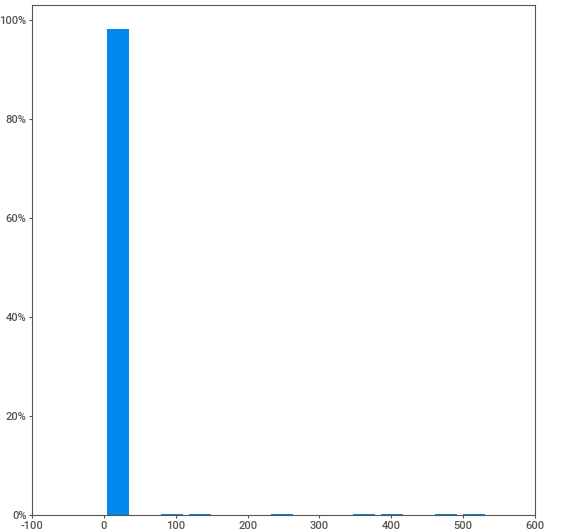
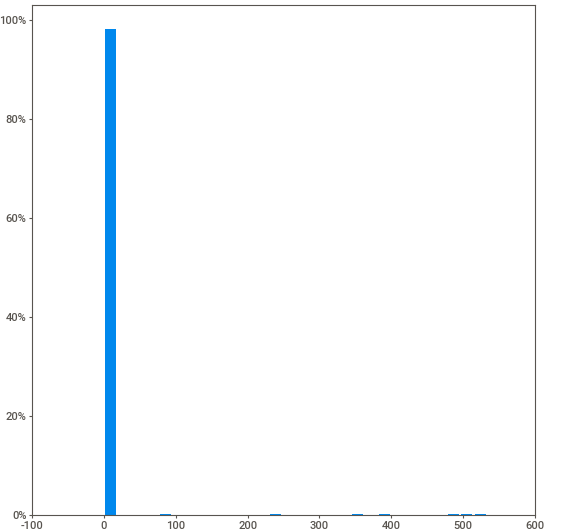
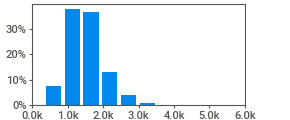
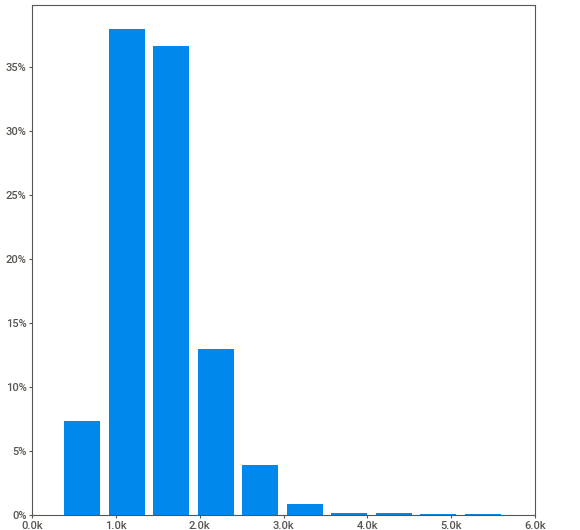
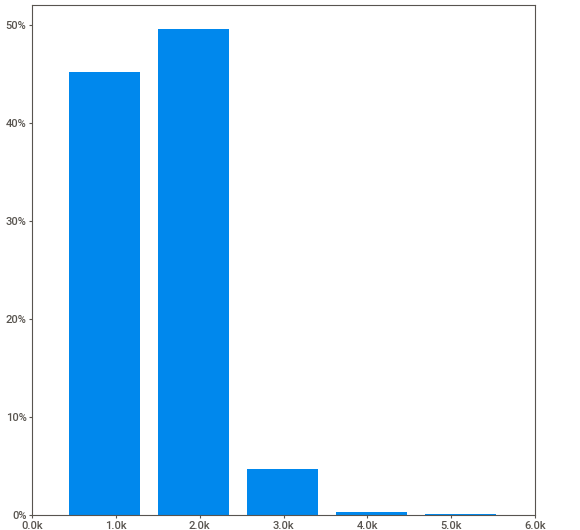
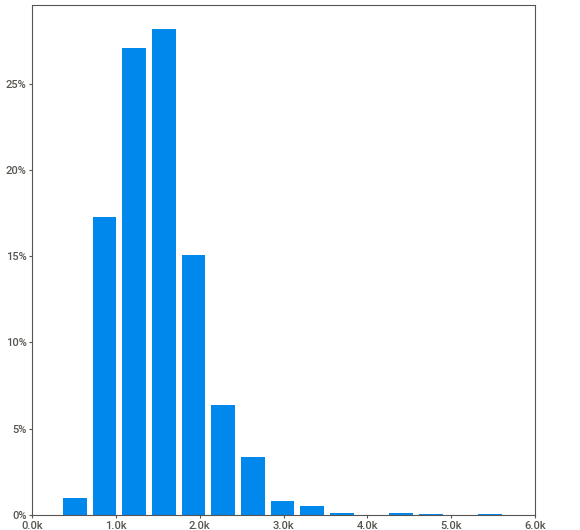
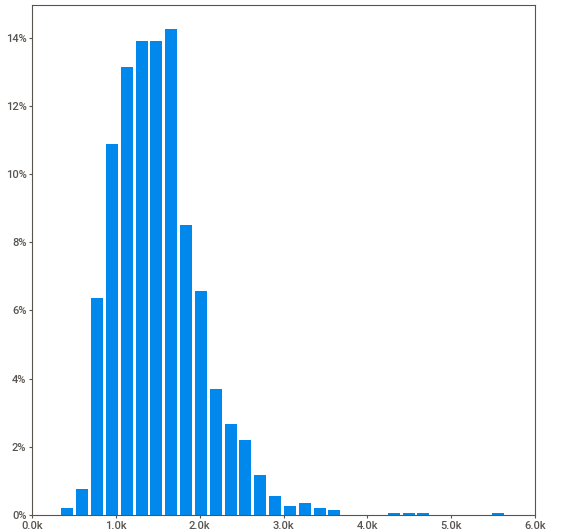
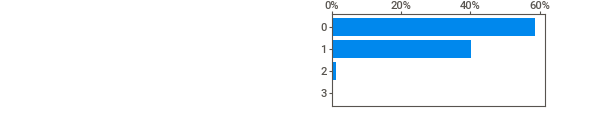
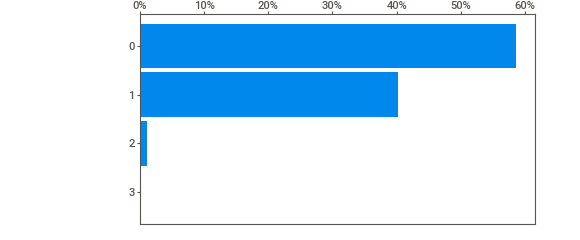
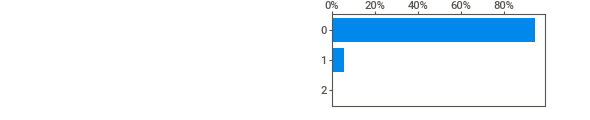
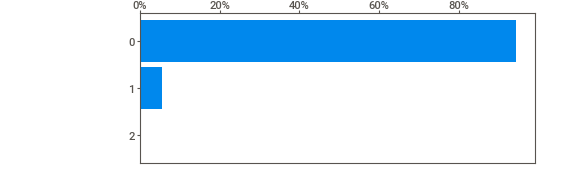
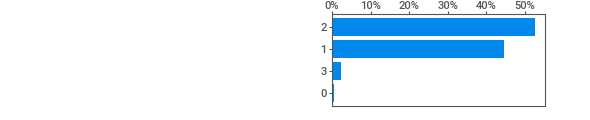
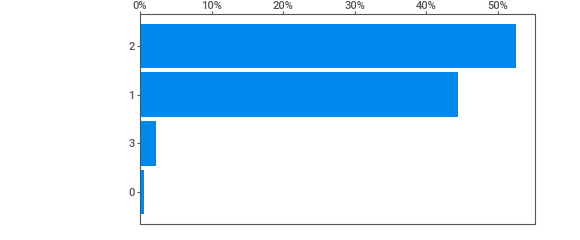
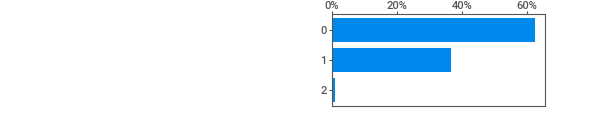
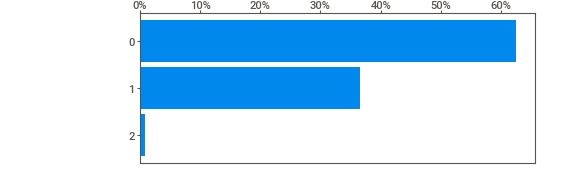
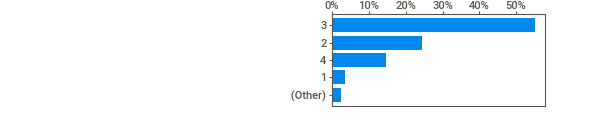
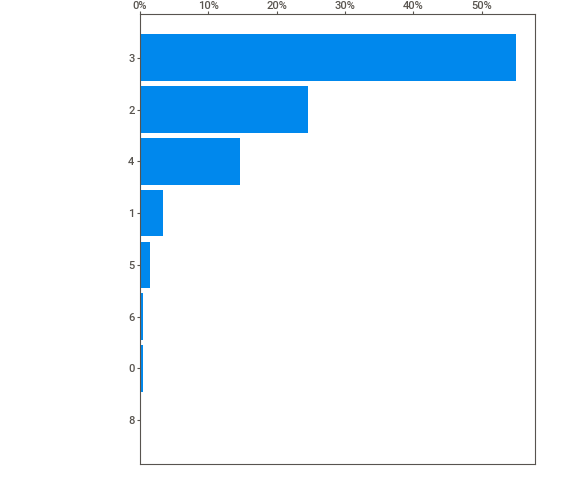
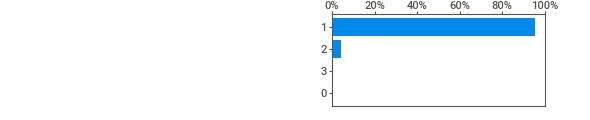
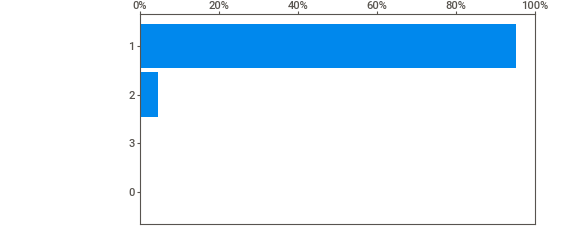
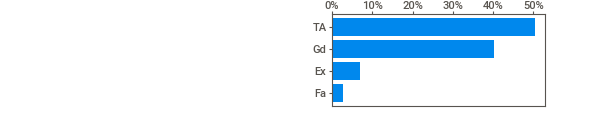
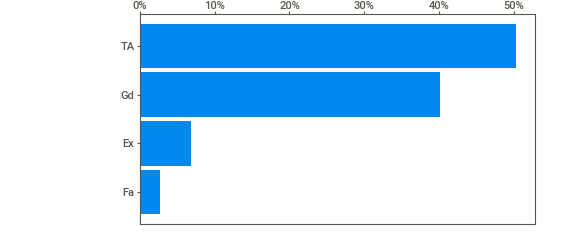
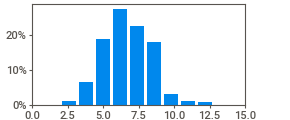
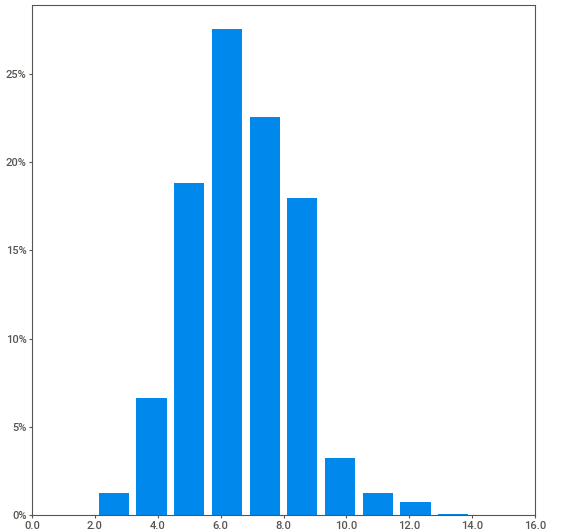
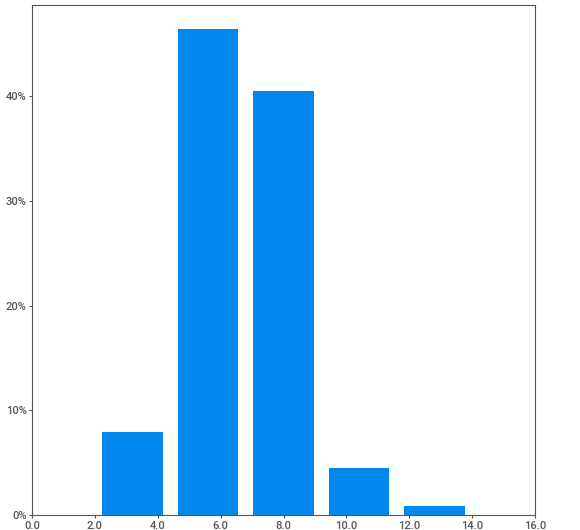
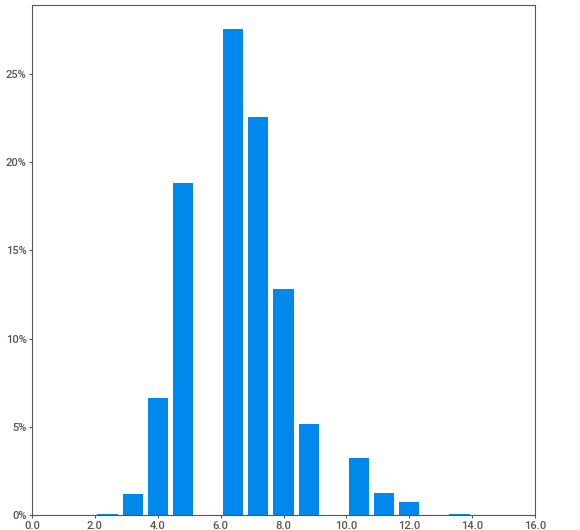
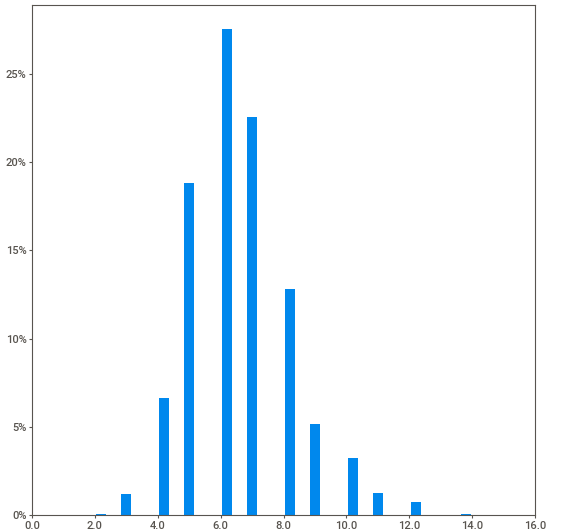
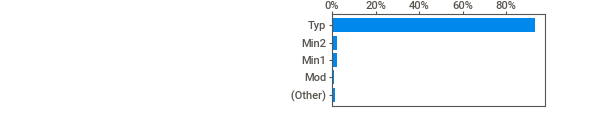
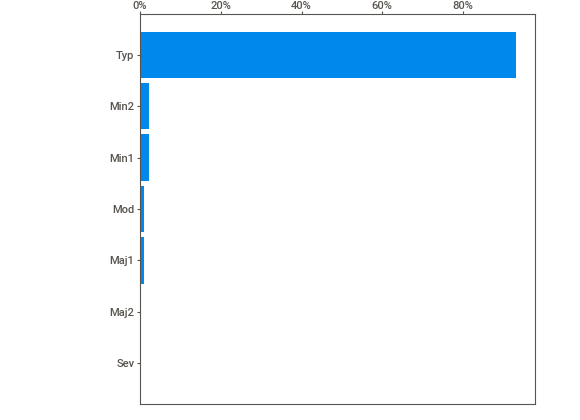
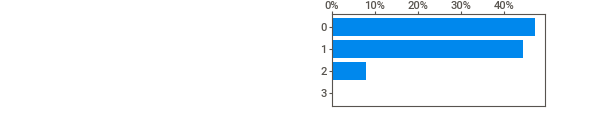
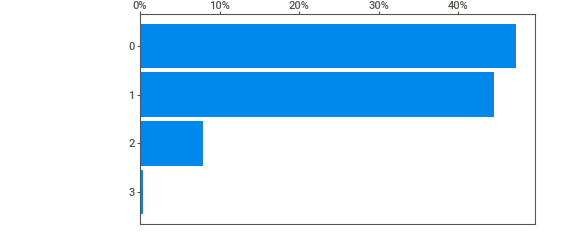
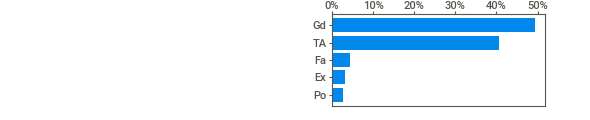
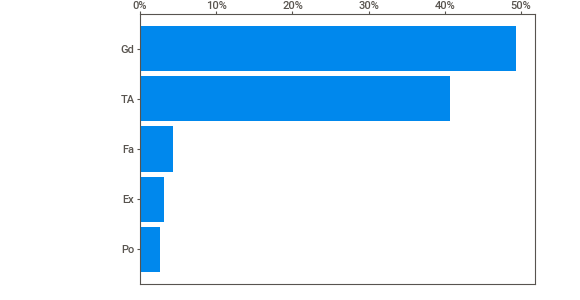
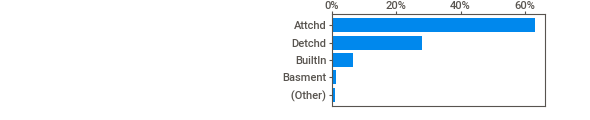
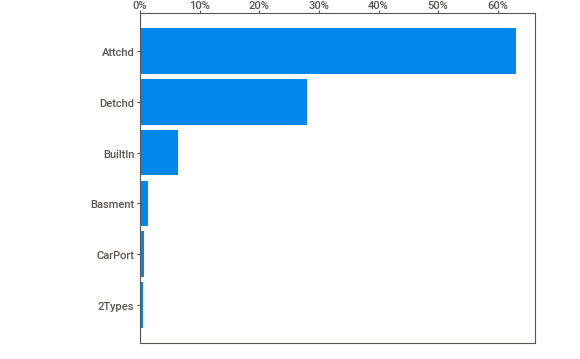
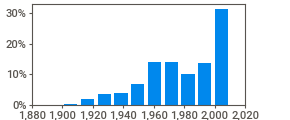
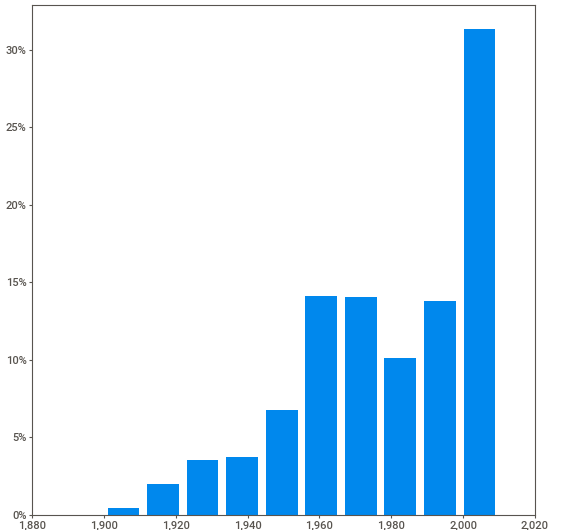
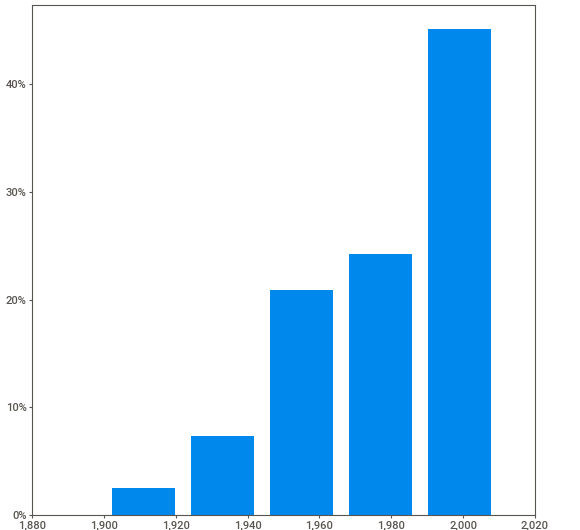
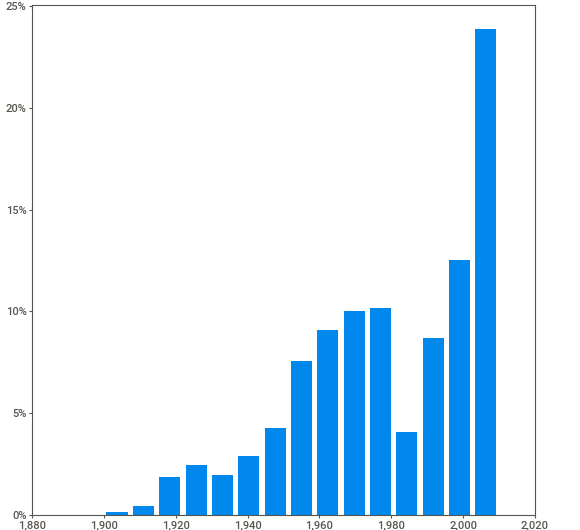
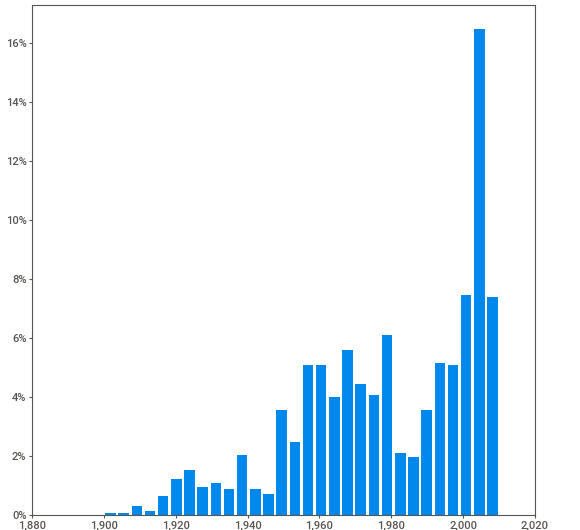
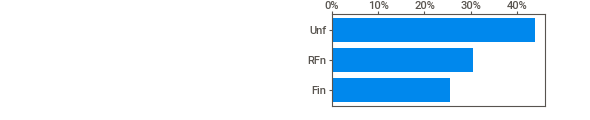
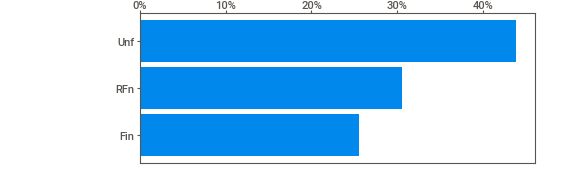
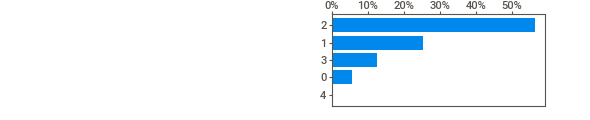
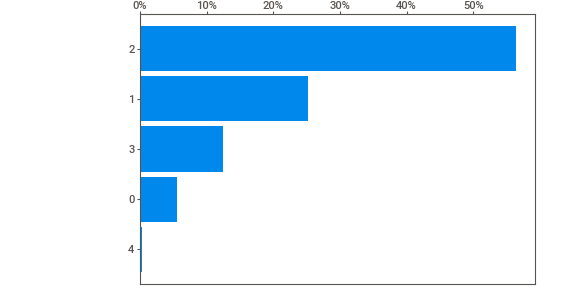
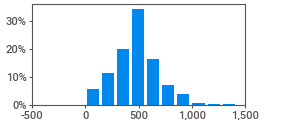
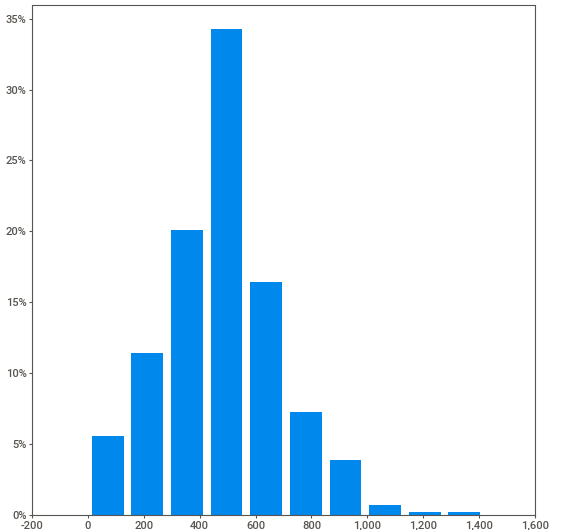
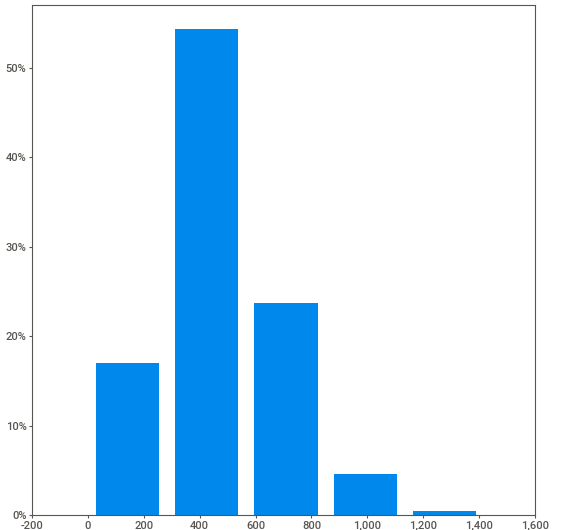
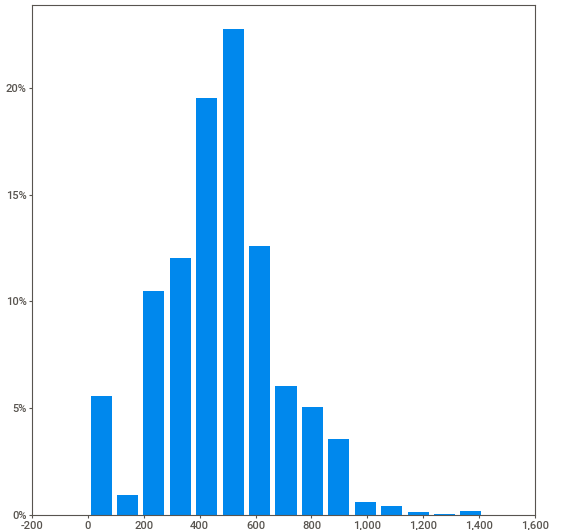
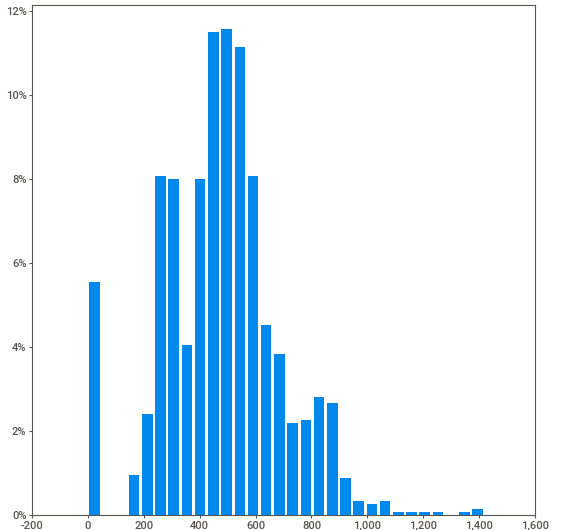
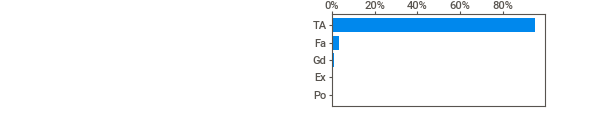
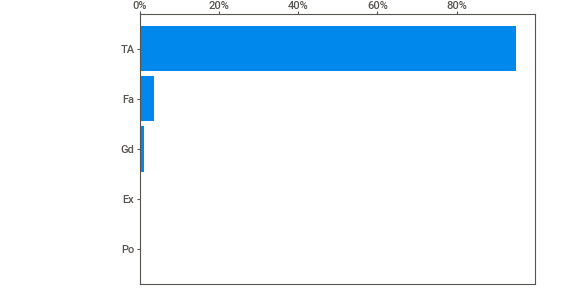
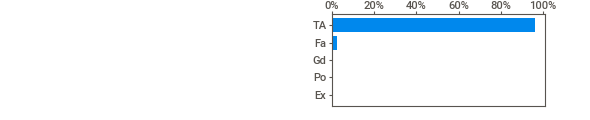
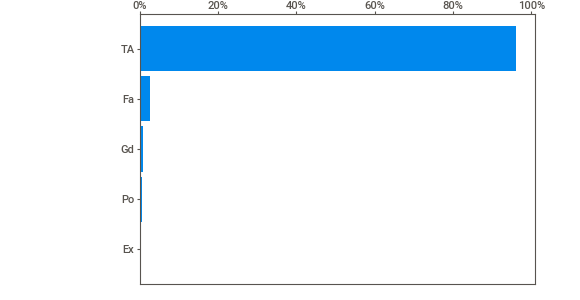
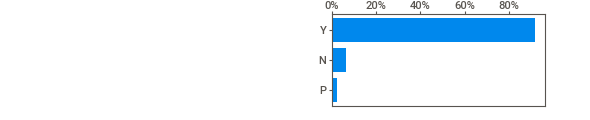
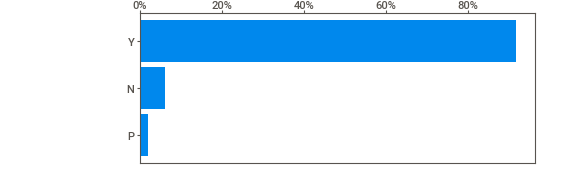
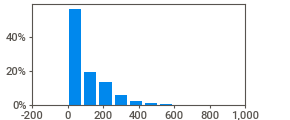
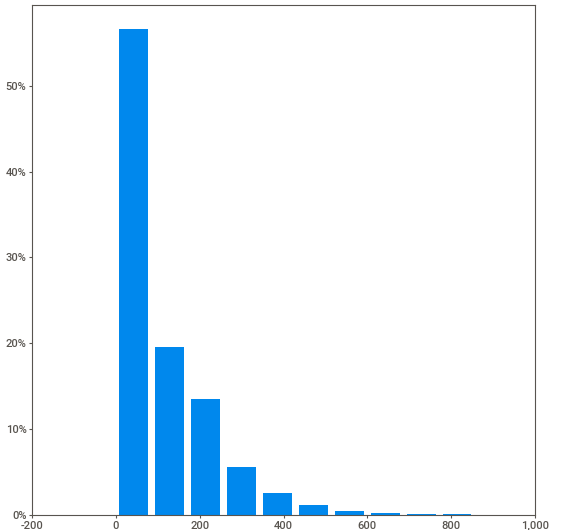
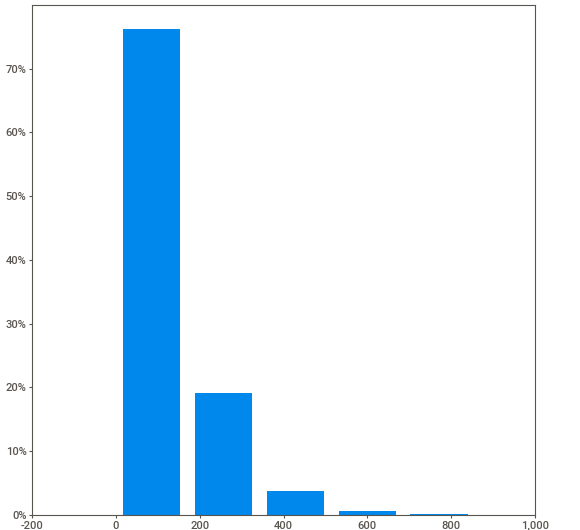
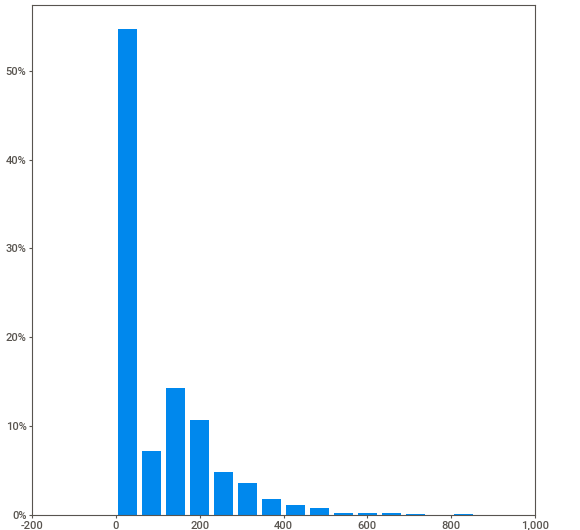
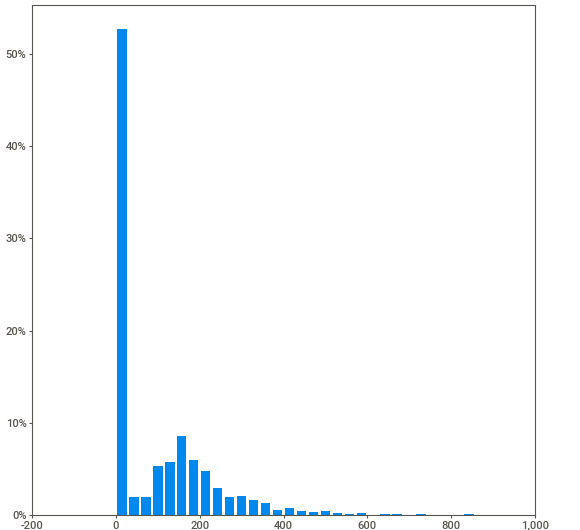
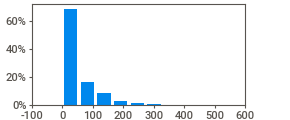
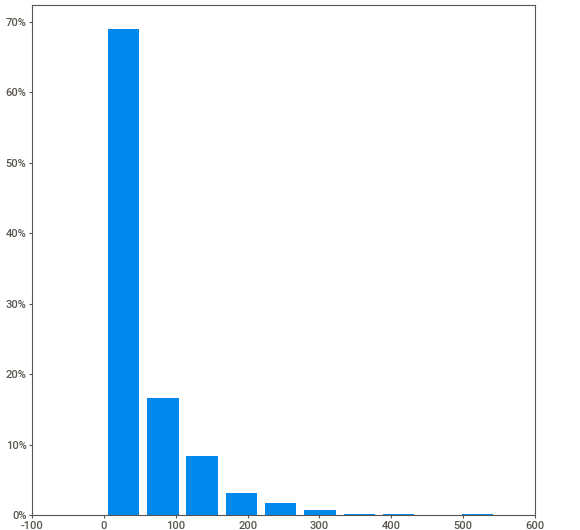
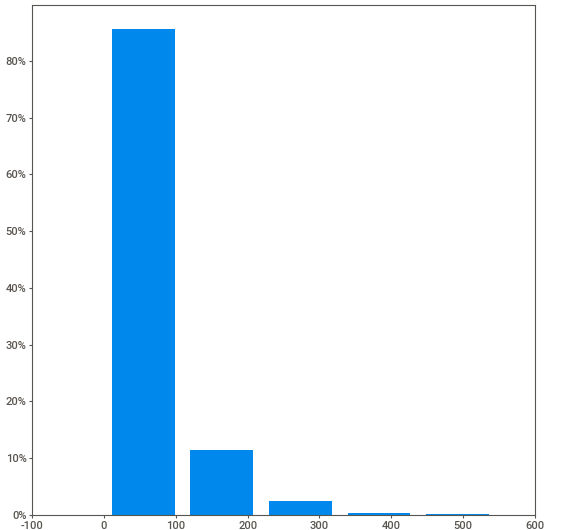
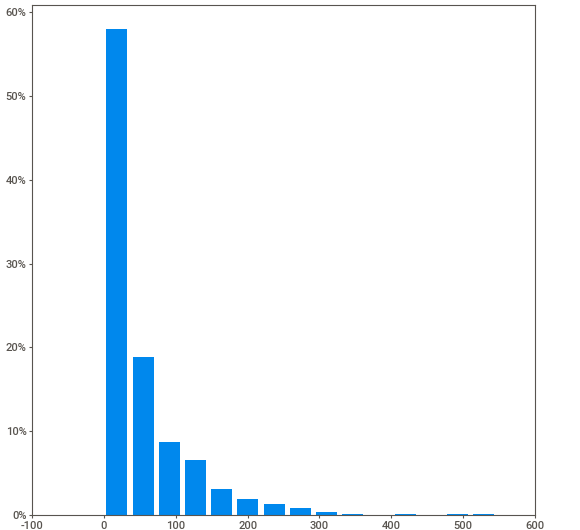
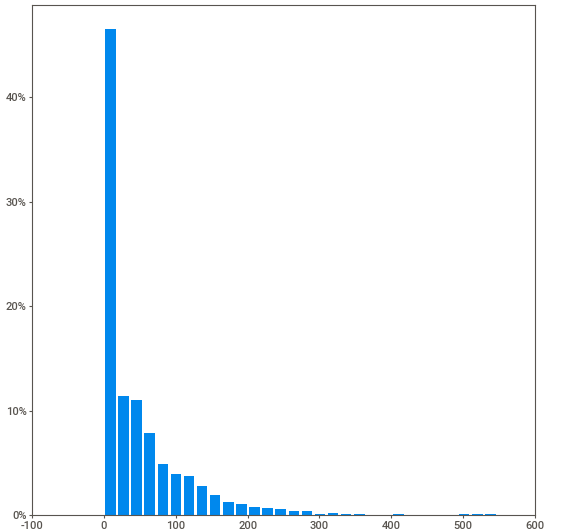
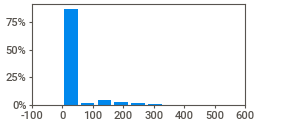
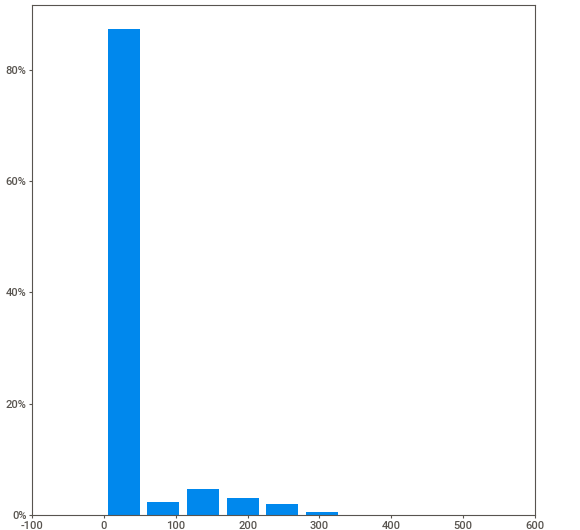
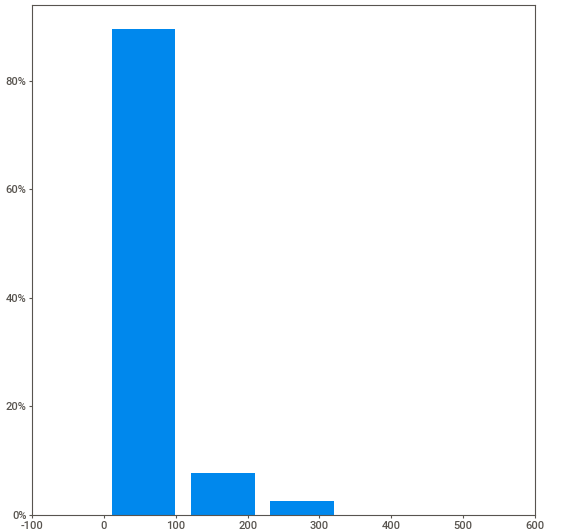
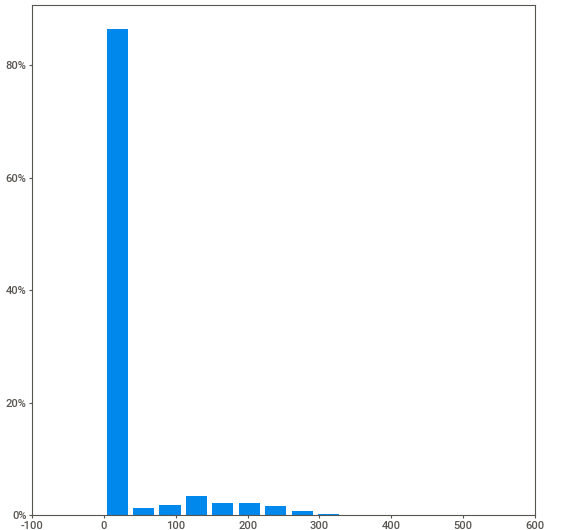
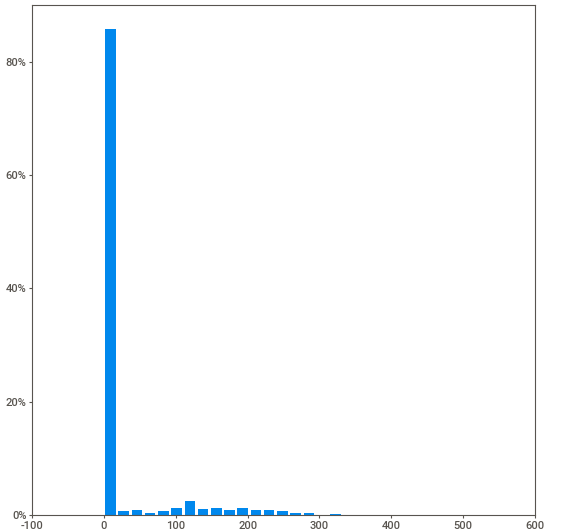
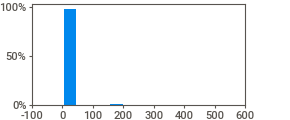
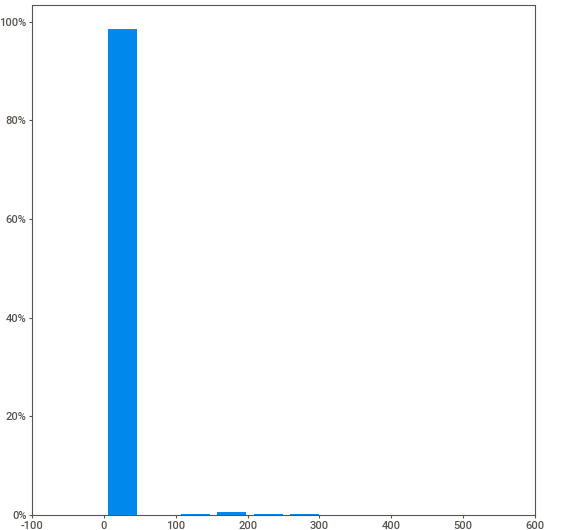
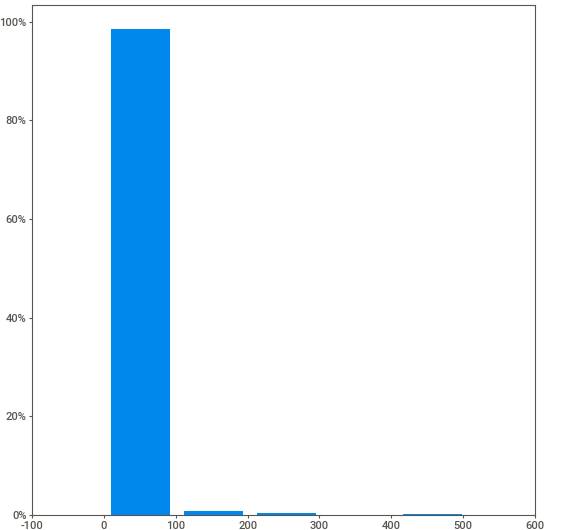
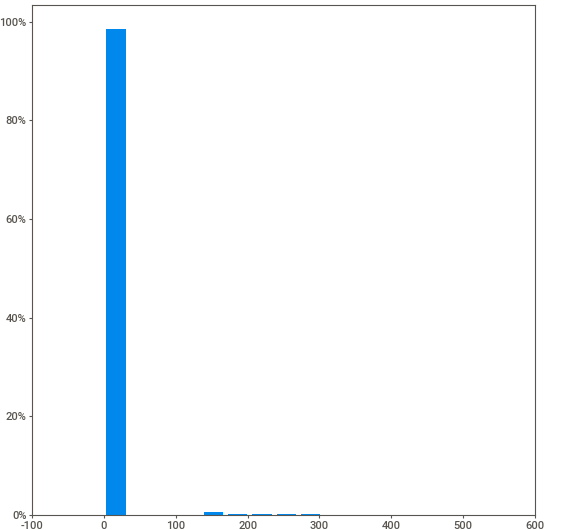
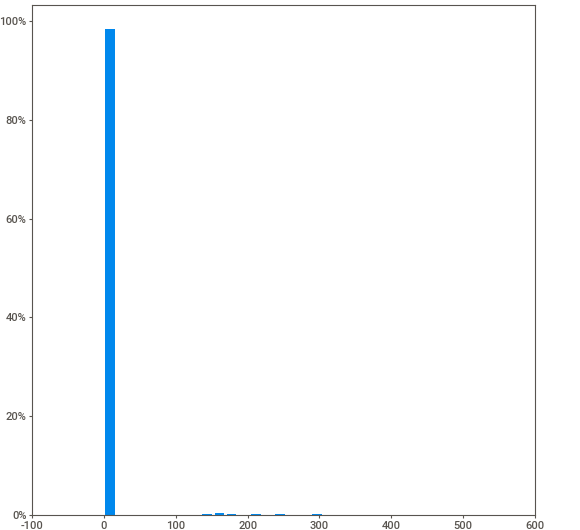
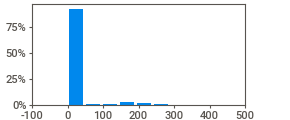
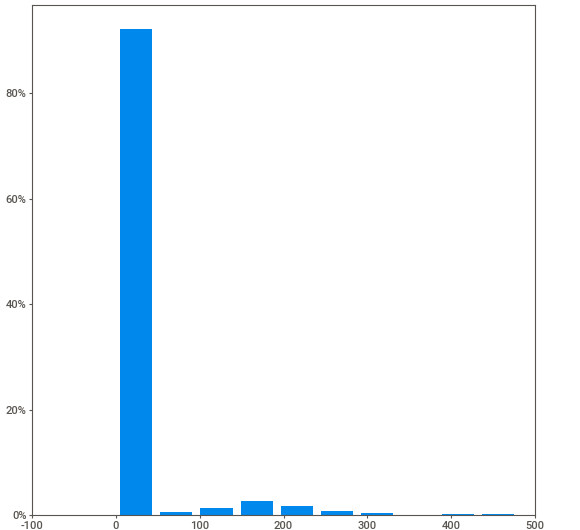
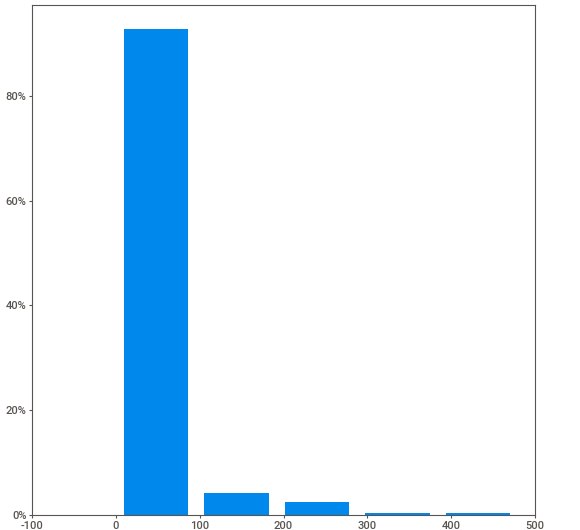
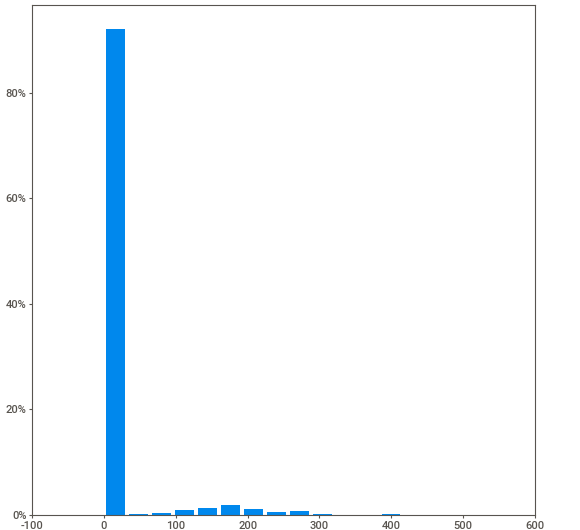
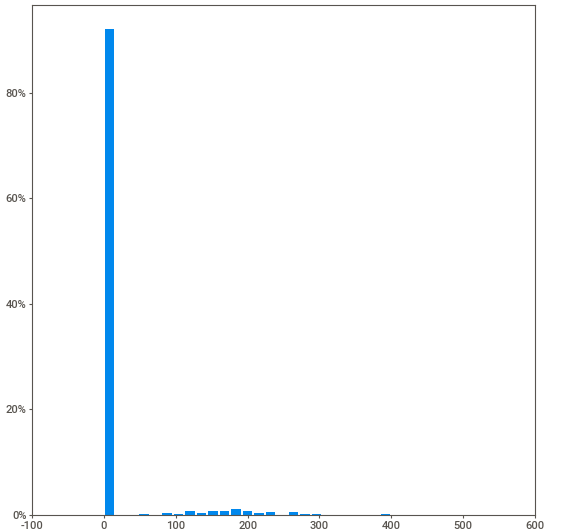
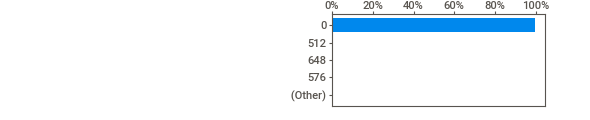
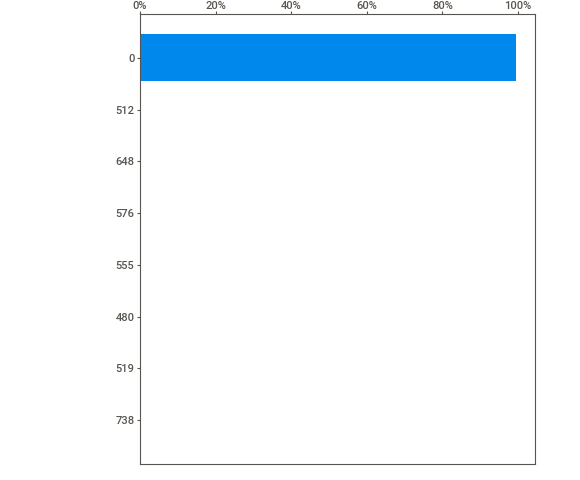
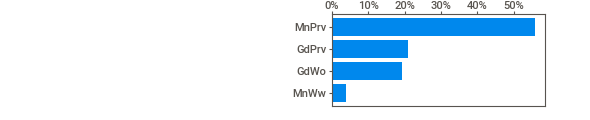
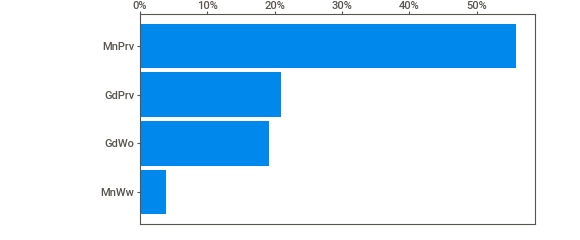
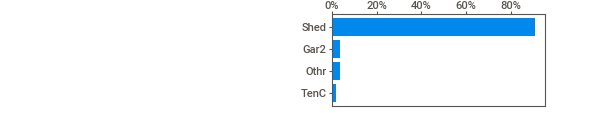
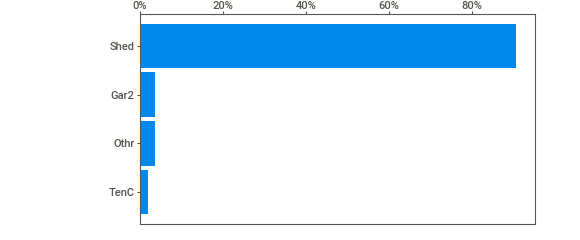
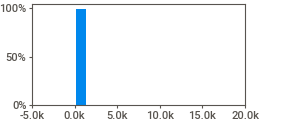
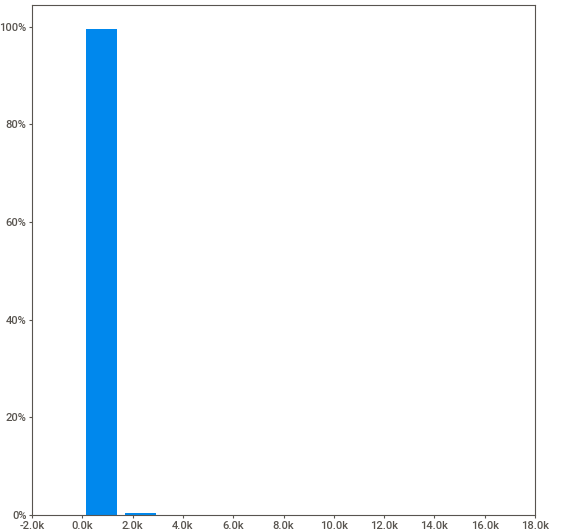
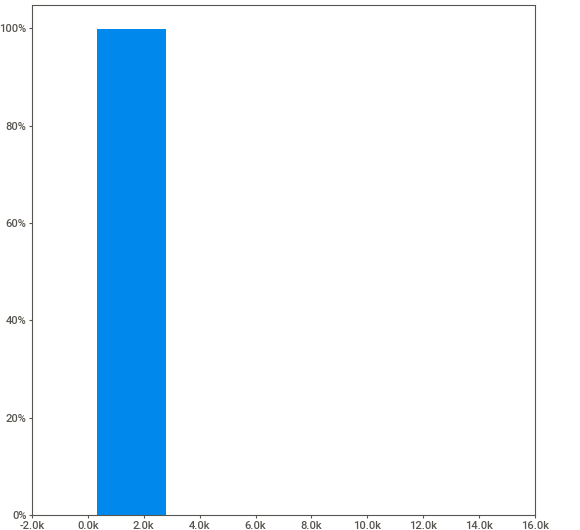
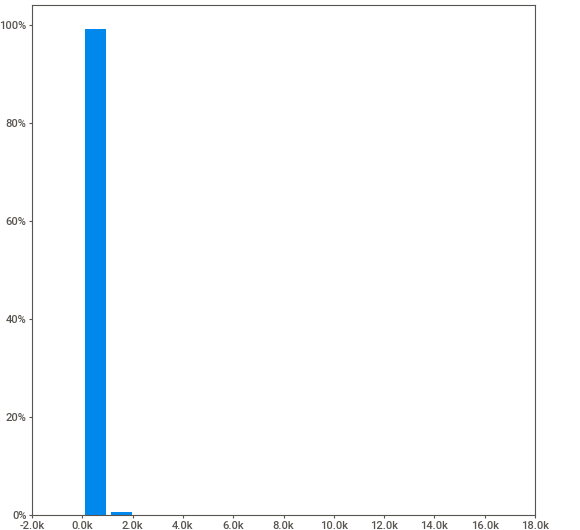
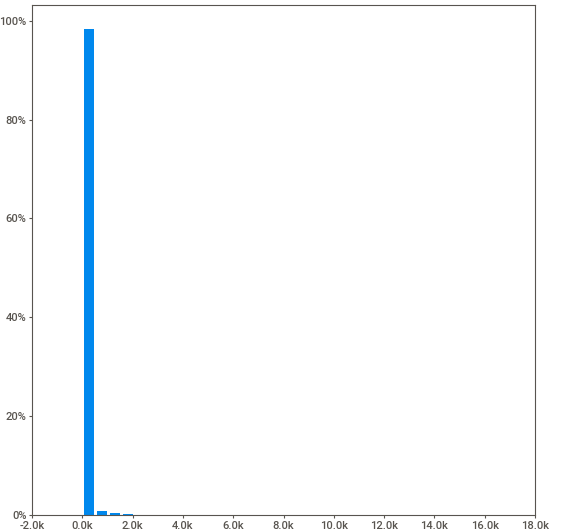
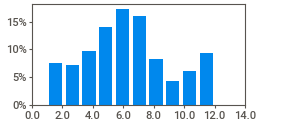
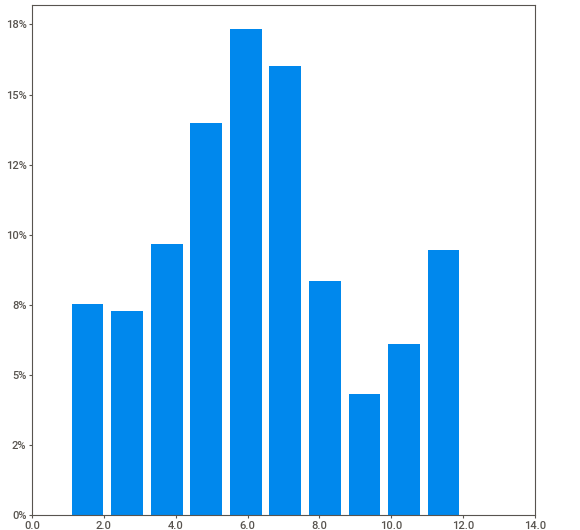
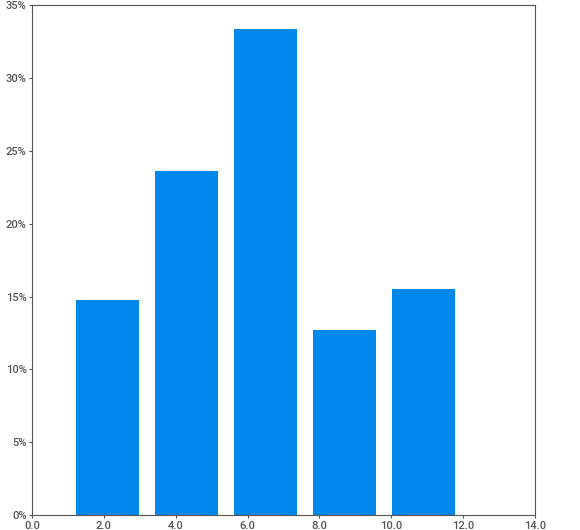
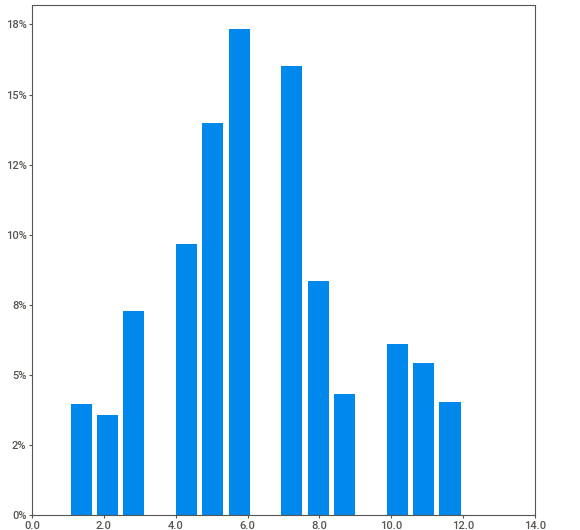
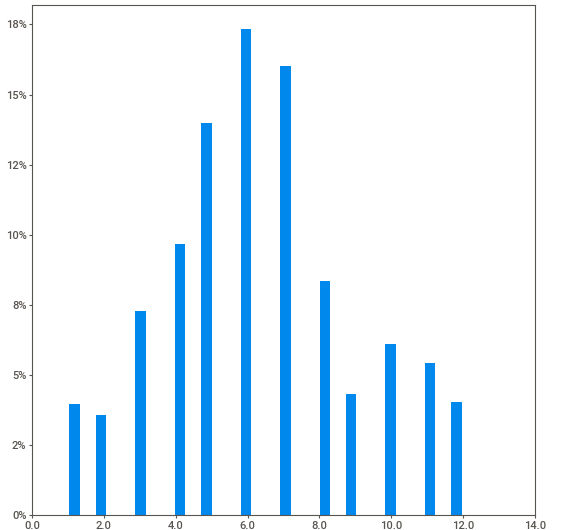
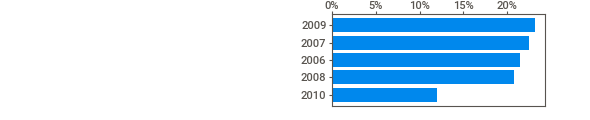
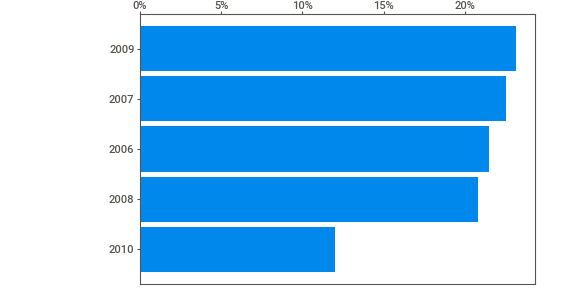
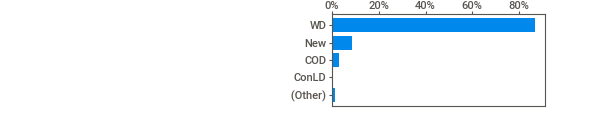
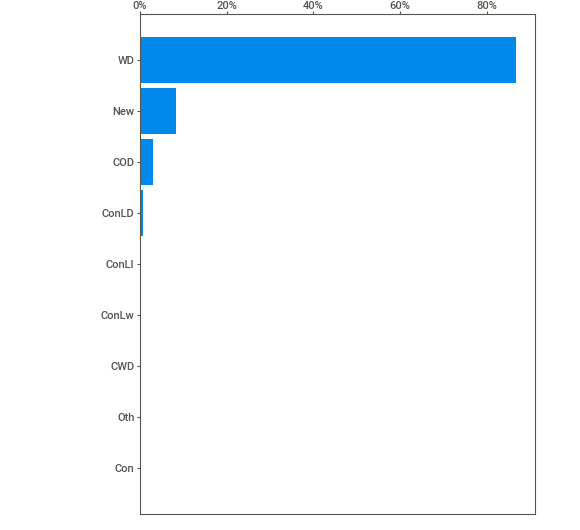
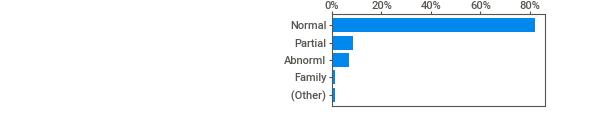
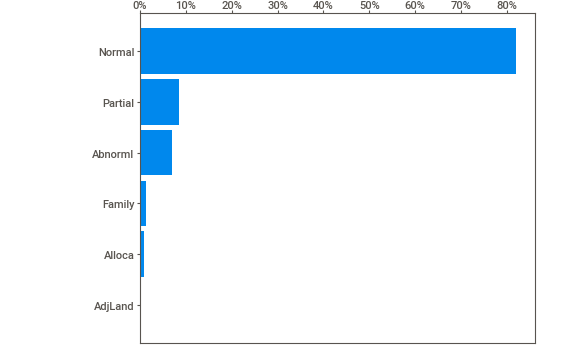
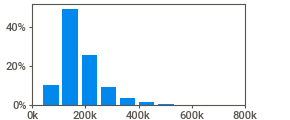
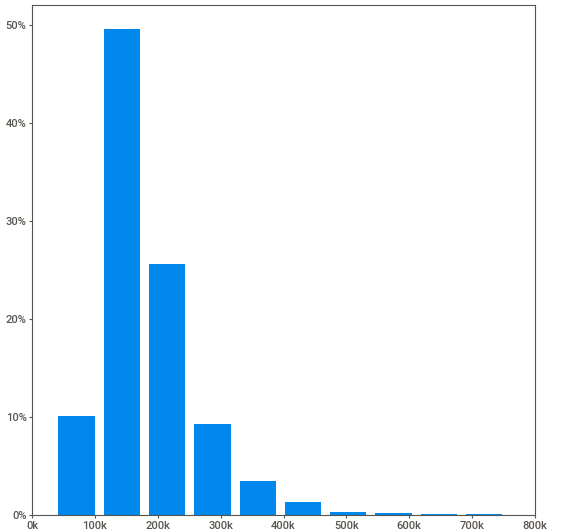
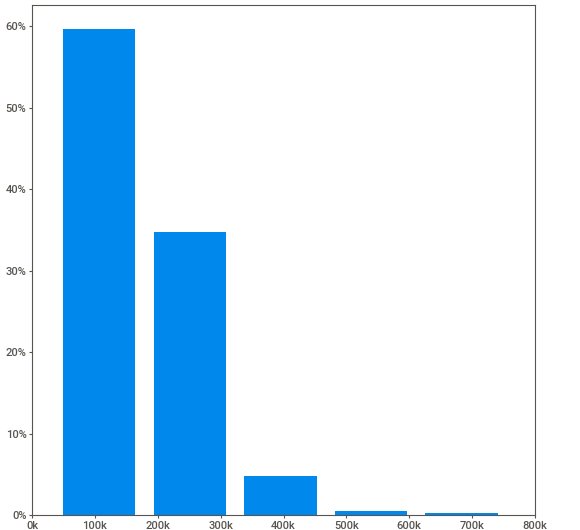
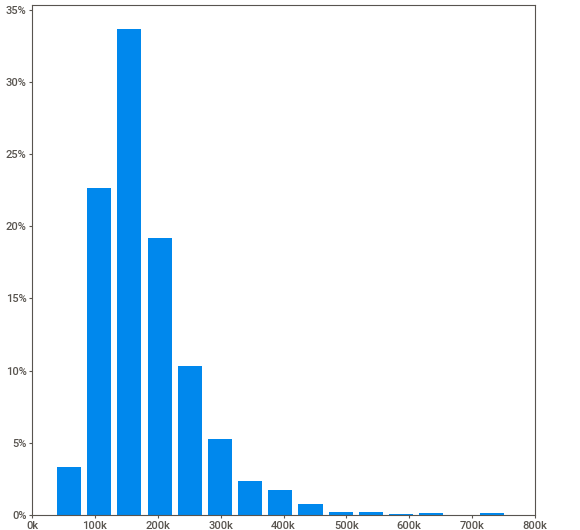
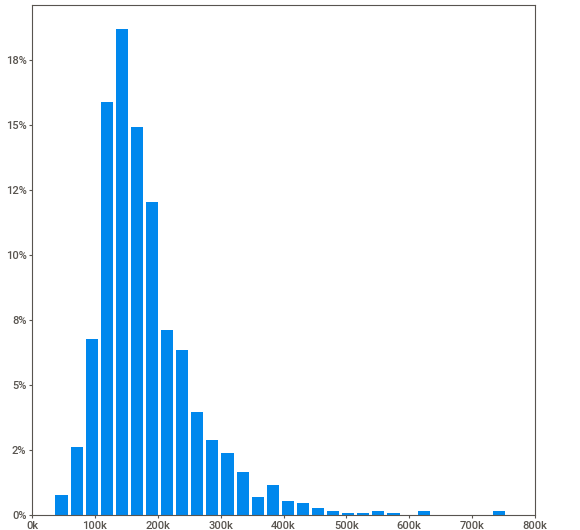
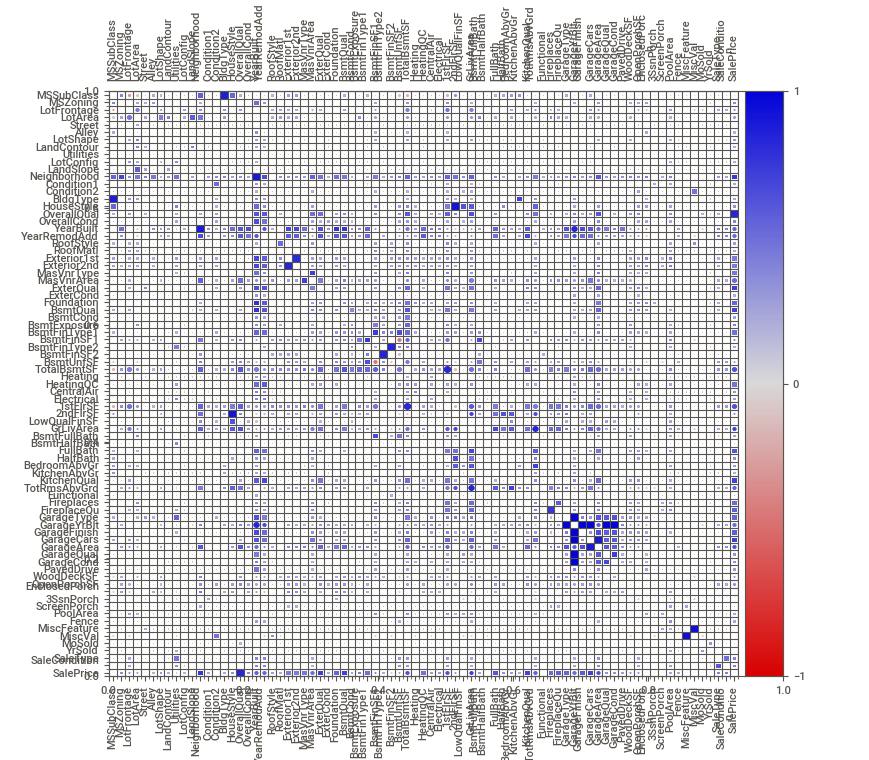
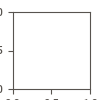

In [13]:
# Getting univariate analysis with sweetviz library

import sweetviz as sv
my_report = sv.analyze(data.drop('Id', axis=1))
my_report.show_notebook()

only numerical values 

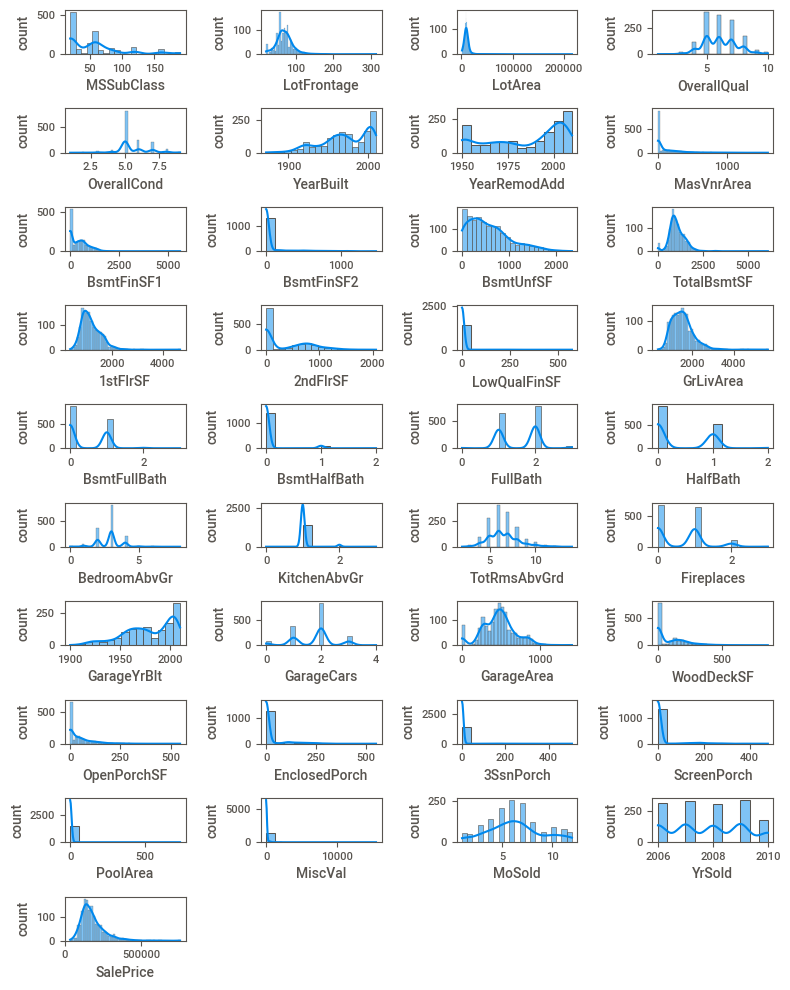

In [14]:
plt.figure(figsize=(8,10))
plotnum = 1
for column in numerical_columns:
  if plotnum<= len(numerical_columns):
    ax = plt.subplot(10,4,plotnum)
    sns.histplot(x=data[column],kde=True)
    plt.xlabel(column,fontsize=10)
    plt.ylabel("count",fontsize=10)
  plotnum+=1
plt.tight_layout()

only categorical values

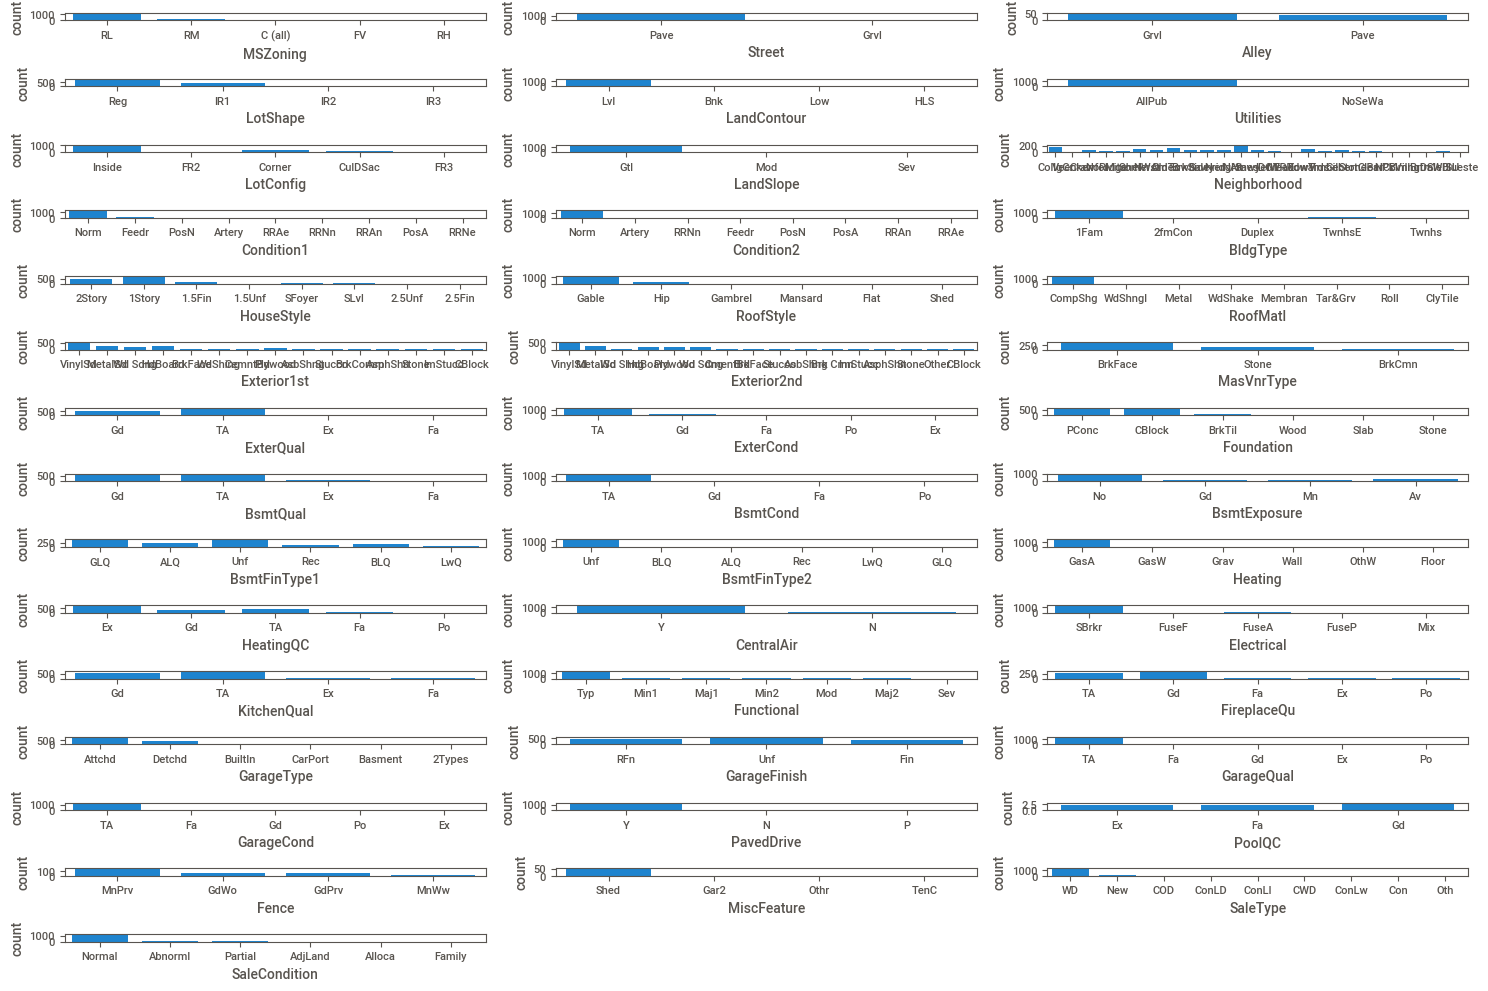

In [15]:
plt.figure(figsize=(15,10))
plotnum = 1
for column in categorical_columns:
  if plotnum<= len(categorical_columns):
    ax = plt.subplot(15,3,plotnum)
    sns.countplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("count",fontsize=10)
  plotnum+=1
plt.tight_layout()

### Bivariate

correlation between numerical features and Sale Price

In [16]:
corr_matrix = data[numerical_columns].corr()
corr_matrix.style.background_gradient(cmap='magma')

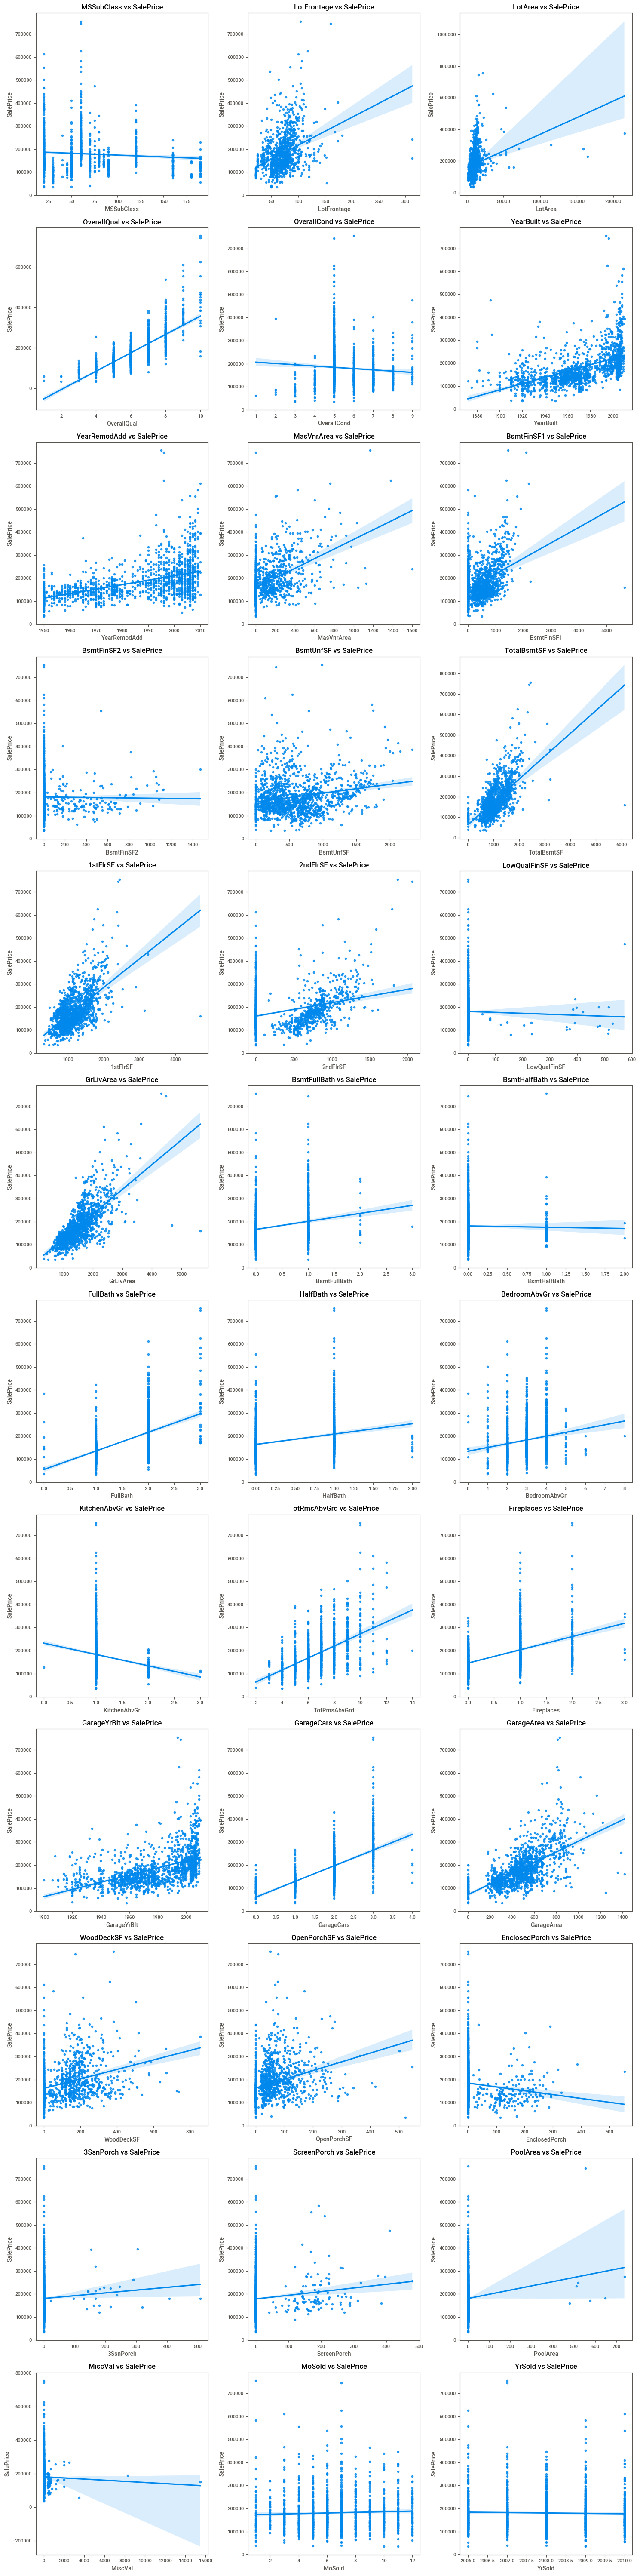

In [17]:
columns_to_plot = [col for col in data[numerical_columns].columns if col != 'SalePrice']
num_cols = 3
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
for i, col in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.regplot(data=data[numerical_columns], x=col, y='SalePrice', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{col} vs SalePrice')
    
num_features = len(columns_to_plot)
for i in range(num_features, num_rows*num_cols):
    axes.flatten()[i].axis('off')
plt.tight_layout()
plt.show()

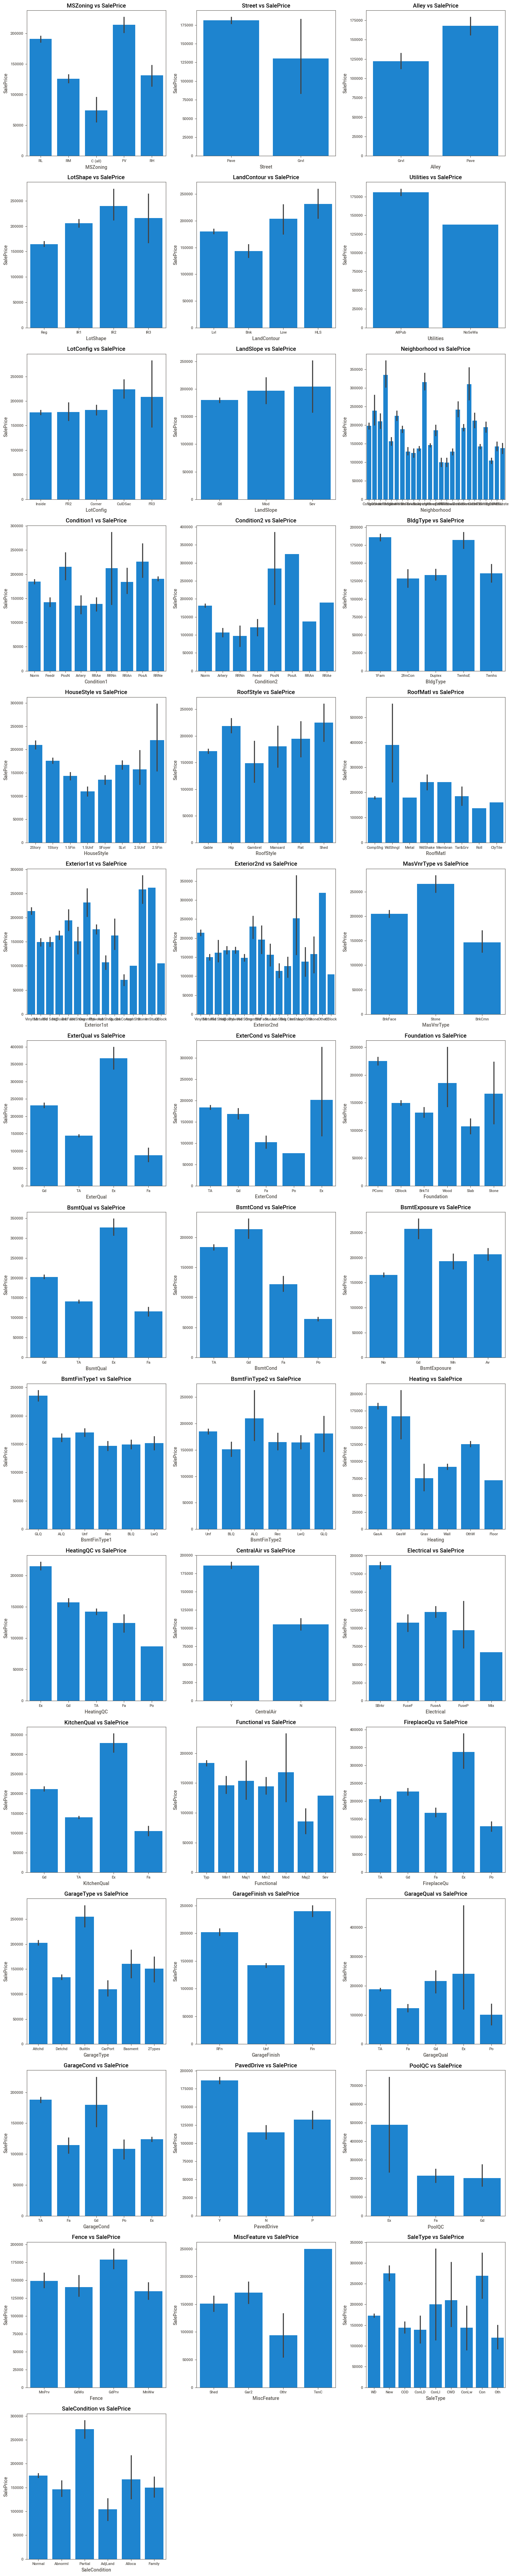

In [18]:
columns_to_plot = [col for col in data[categorical_columns].columns]
num_cols = 3
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
for i, col in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.barplot(data=data[categorical_columns], x=col, y=data['SalePrice'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{col} vs SalePrice')
    
num_features = len(columns_to_plot)
for i in range(num_features, num_rows*num_cols):
    axes.flatten()[i].axis('off')
plt.tight_layout()
plt.show()

## 5. Data Preprocessing

### checking and treatment of missing values

In [19]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [20]:
missing_percentage = data.isnull().sum()/len(data)*100
missing_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [21]:
# getting the columns which has missing value of more than 50%
more_missing_columns = missing_percentage[missing_percentage >50]
more_missing_columns


Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [22]:
data_new = data.copy()

In [23]:
#drop the columns which has missing values more than 50%
data_new = data_new.drop(data[more_missing_columns.keys()], axis = 1)

In [24]:
data_new

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ...             0         0           0   
1            Lvl    AllPub       FR2  ...             0         0           0   
2            Lvl    AllPub    Inside  ...             0         0           0   
3            Lvl    AllPub    Corner  ...           272         0           0   
4            Lvl    AllPub       FR2  ...             0         0           0   
...          ...       ...       ...  ...           ...       ...         ...   
1455         Lvl    AllPub    Inside  ...             0         0           0   
1456         Lvl    AllPub    Inside  ...             0         0           0   
1457         Lvl    AllPub    Inside  ...             0         0           0   
1458         Lvl    AllPub    Inside  ...           112         0           0   
1459         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           0       0      2    2008        WD         Normal     208500  
1           0       0      5    2007        WD         Normal     181500  
2           0       0      9    2008        WD         Normal     223500  
3           0       0      2    2006        WD        Abnorml     140000  
4           0       0     12    2008        WD         Normal     250000  
...       ...     ...    ...     ...       ...            ...        ...  
1455        0       0      8    2007        WD         Normal     175000  
1456        0       0      2    2010        WD         Normal     210000  
1457        0    2500      5    2010        WD         Normal     266500  
1458        0       0      4    2010        WD         Normal     142125  
1459        0       0      6    2008        WD         Normal     147500  

[1460 rows x 76 columns]

In [25]:
data_new = data_new.drop('Id', axis=1)
data_new

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 75 columns]

In [26]:
missing_percentage = data_new.isnull().sum() / len(data_new)*100
missing_columns = missing_percentage[missing_percentage > 0]
missing_columns

LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64


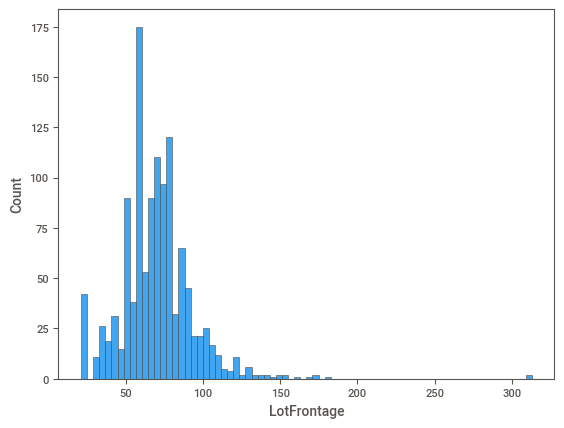

In [27]:
print(data_new['LotFrontage'])
sns.histplot(data_new['LotFrontage']);

In [28]:
# fill the null value with median for right skewed
data_new['LotFrontage']= data_new['LotFrontage'].fillna(data_new['LotFrontage'].median())
data_new['LotFrontage'].isnull().sum()

0

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='FireplaceQu'>

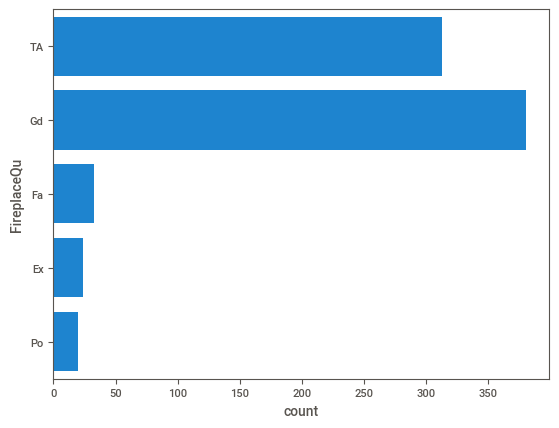

In [29]:
print(data_new['FireplaceQu'])
sns.countplot(data_new['FireplaceQu'])

In [30]:
# fill the null value with mode
data_new['FireplaceQu'] = data_new['FireplaceQu'].fillna(data_new['FireplaceQu'].mode)
data_new['FireplaceQu'].isnull().sum()

0

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='GarageType'>

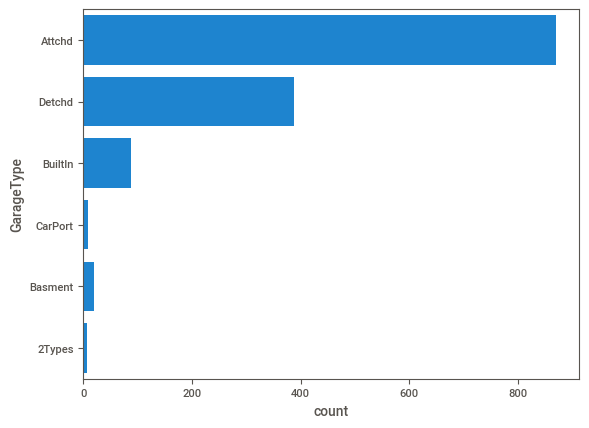

In [31]:
print(data_new['GarageType'])
sns.countplot(data_new['GarageType'])

In [32]:
# fill the null value with mode
data_new['GarageType'] = data_new['GarageType'].fillna(data_new['GarageType'].mode)
data_new['GarageType'].isnull().sum()

0

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64


<Axes: xlabel='GarageYrBlt', ylabel='Count'>

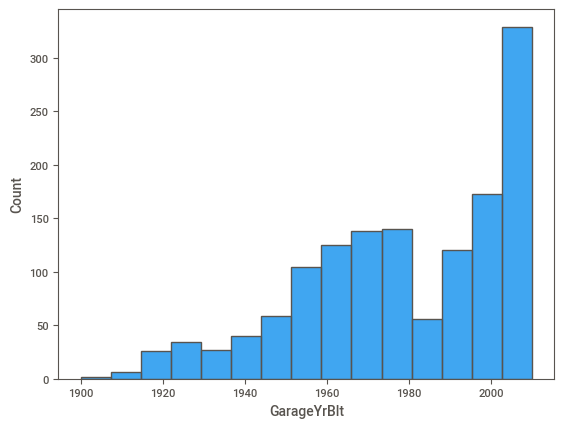

In [33]:
print(data_new['GarageYrBlt'])
sns.histplot(data_new['GarageYrBlt'])

In [34]:
# since this is representing year we'll use mode to fill null value
data_new['GarageYrBlt'] = data_new['GarageYrBlt'].fillna(data_new['GarageYrBlt'].mode)
data_new['GarageYrBlt'].isnull().sum()

0

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='GarageFinish'>

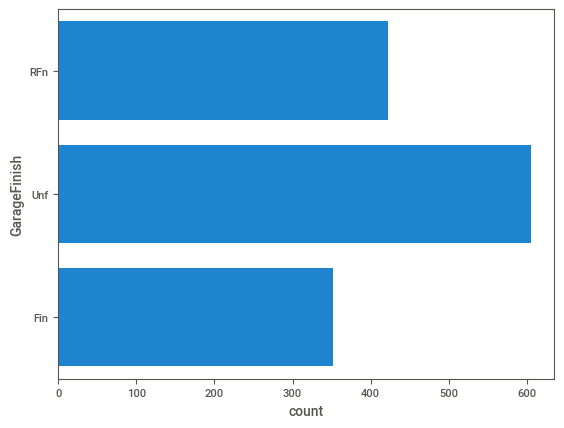

In [35]:
print(data_new['GarageFinish'])
sns.countplot(data_new['GarageFinish'])

In [36]:
# fill the null value with mode
data_new['GarageFinish'] = data_new['GarageFinish'].fillna(data_new['GarageFinish'].mode)
data_new['GarageFinish'].isnull().sum()

0

In [37]:
missing_percentage = data_new.isnull().sum() / len(data_new)*100
missing_columns = missing_percentage[missing_percentage > 0]
missing_columns

MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='GarageQual'>

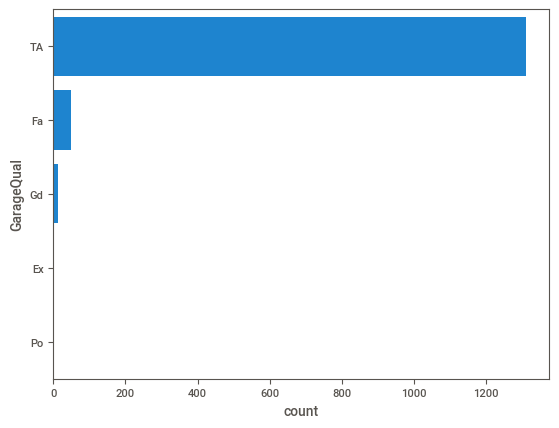

In [38]:
print(data_new['GarageQual'])
sns.countplot(data_new['GarageQual'])

In [39]:
# fill the null value with mode
data_new['GarageQual'] = data_new['GarageQual'].fillna(data_new['GarageQual'].mode)
data_new['GarageQual'].isnull().sum()

0

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='GarageCond'>

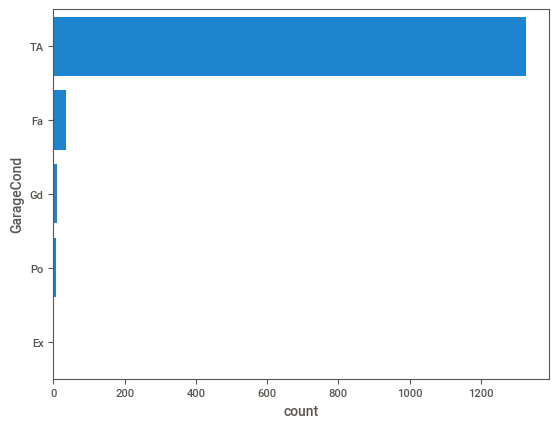

In [40]:
print(data_new['GarageCond'])
sns.countplot(data_new['GarageCond'])

In [41]:
# fill the null value with mode
data_new['GarageCond'] = data_new['GarageCond'].fillna(data_new['GarageCond'].mode)
data_new['GarageCond'].isnull().sum()

0

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='BsmtCond'>

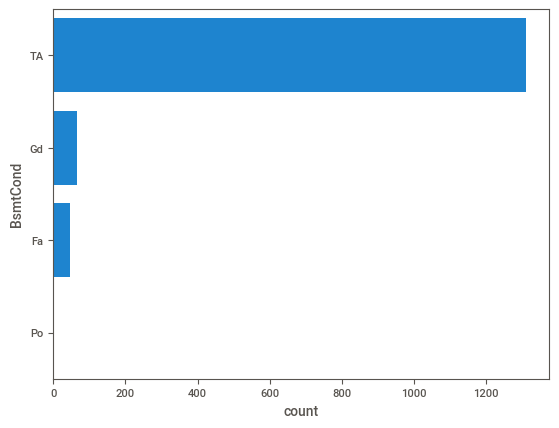

In [42]:
print(data_new['BsmtCond'])
sns.countplot(data_new['BsmtCond'])

In [43]:
# fill the null value with mode
data_new['BsmtCond'] = data_new['BsmtCond'].fillna(data_new['BsmtCond'].mode)
data_new['BsmtCond'].isnull().sum()

0

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='BsmtQual'>

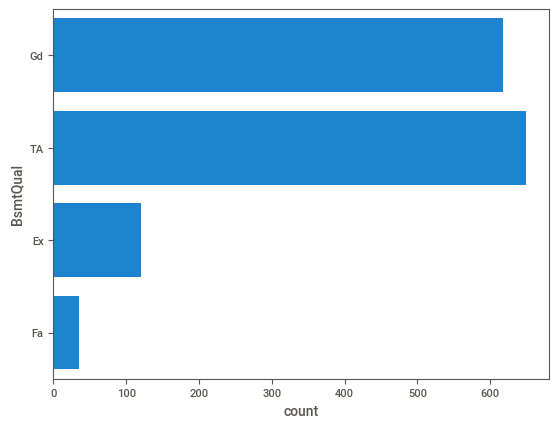

In [44]:
print(data_new['BsmtQual'])
sns.countplot(data_new['BsmtQual'])

In [45]:
# fill the null value with mode
data_new['BsmtQual'] = data_new['BsmtQual'].fillna(data_new['BsmtQual'].mode)
data_new['BsmtQual'].isnull().sum()

0

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='BsmtExposure'>

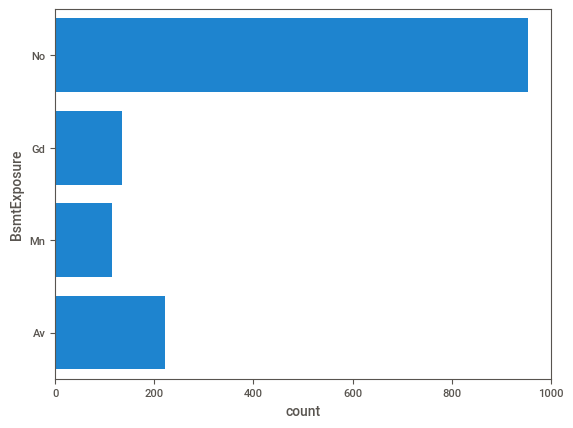

In [46]:
print(data_new['BsmtExposure'])
sns.countplot(data_new['BsmtExposure'])

In [47]:
# fill the null value with mode
data_new['BsmtExposure'] = data_new['BsmtExposure'].fillna(data_new['BsmtExposure'].mode)
data_new['BsmtExposure'].isnull().sum()

0

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='BsmtFinType1'>

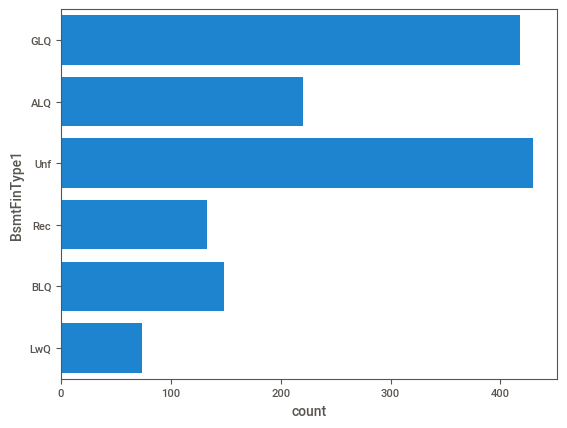

In [48]:
print(data_new['BsmtFinType1'])
sns.countplot(data_new['BsmtFinType1'])

In [49]:
# fill the null value with mode
data_new['BsmtFinType1'] = data_new['BsmtFinType1'].fillna(data_new['BsmtFinType1'].mode)
data_new['BsmtFinType1'].isnull().sum()

0

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='BsmtFinType2'>

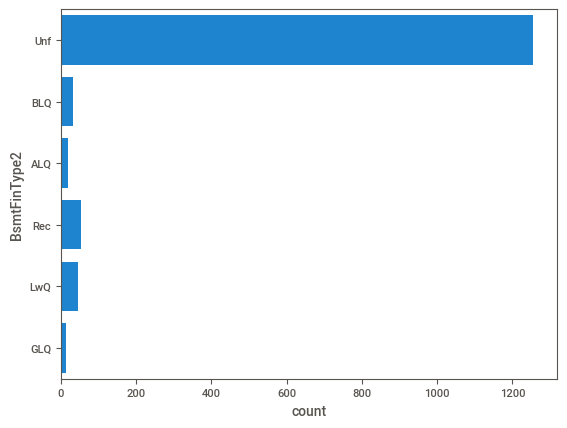

In [50]:
print(data_new['BsmtFinType2'])
sns.countplot(data_new['BsmtFinType2'])

In [51]:
# fill the null value with mode
data_new['BsmtFinType2'] = data_new['BsmtFinType2'].fillna(data_new['BsmtFinType2'].mode)
data_new['BsmtFinType2'].isnull().sum()

0

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64


<Axes: xlabel='MasVnrArea', ylabel='Count'>

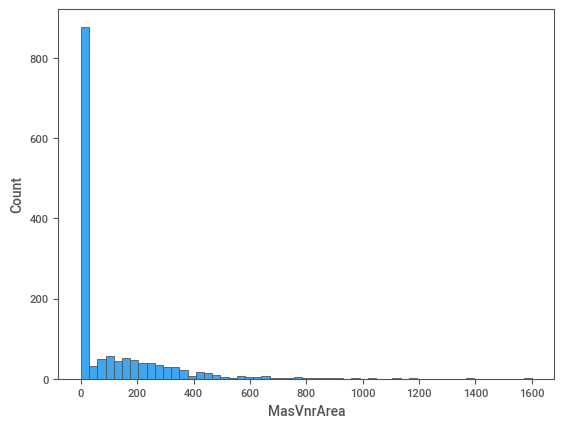

In [52]:
print(data_new['MasVnrArea'])
sns.histplot(data_new['MasVnrArea'])

In [53]:
# fill the null value with median for right skewed
data_new['MasVnrArea']= data_new['MasVnrArea'].fillna(data_new['MasVnrArea'].median())
data_new['MasVnrArea'].isnull().sum()

0

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object


<Axes: xlabel='count', ylabel='Electrical'>

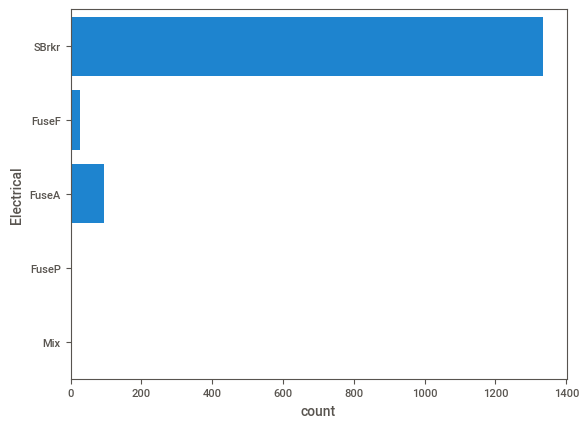

In [54]:
print(data_new['Electrical'])
sns.countplot(data_new['Electrical'])

In [55]:
# fill the null value with mode
data_new['Electrical'] = data_new['Electrical'].fillna(data_new['Electrical'].mode)
data_new['Electrical'].isnull().sum()

0

In [56]:
missing_percentage = data_new.isnull().sum() / len(data_new)*100
missing_columns = missing_percentage[missing_percentage > 0]
missing_columns

Series([], dtype: float64)

In [57]:
len(data_new.columns)

75

### Check Duplicates

In [58]:
data_new.duplicated().sum()

0

### Check for the outliers

In [59]:
data_new.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

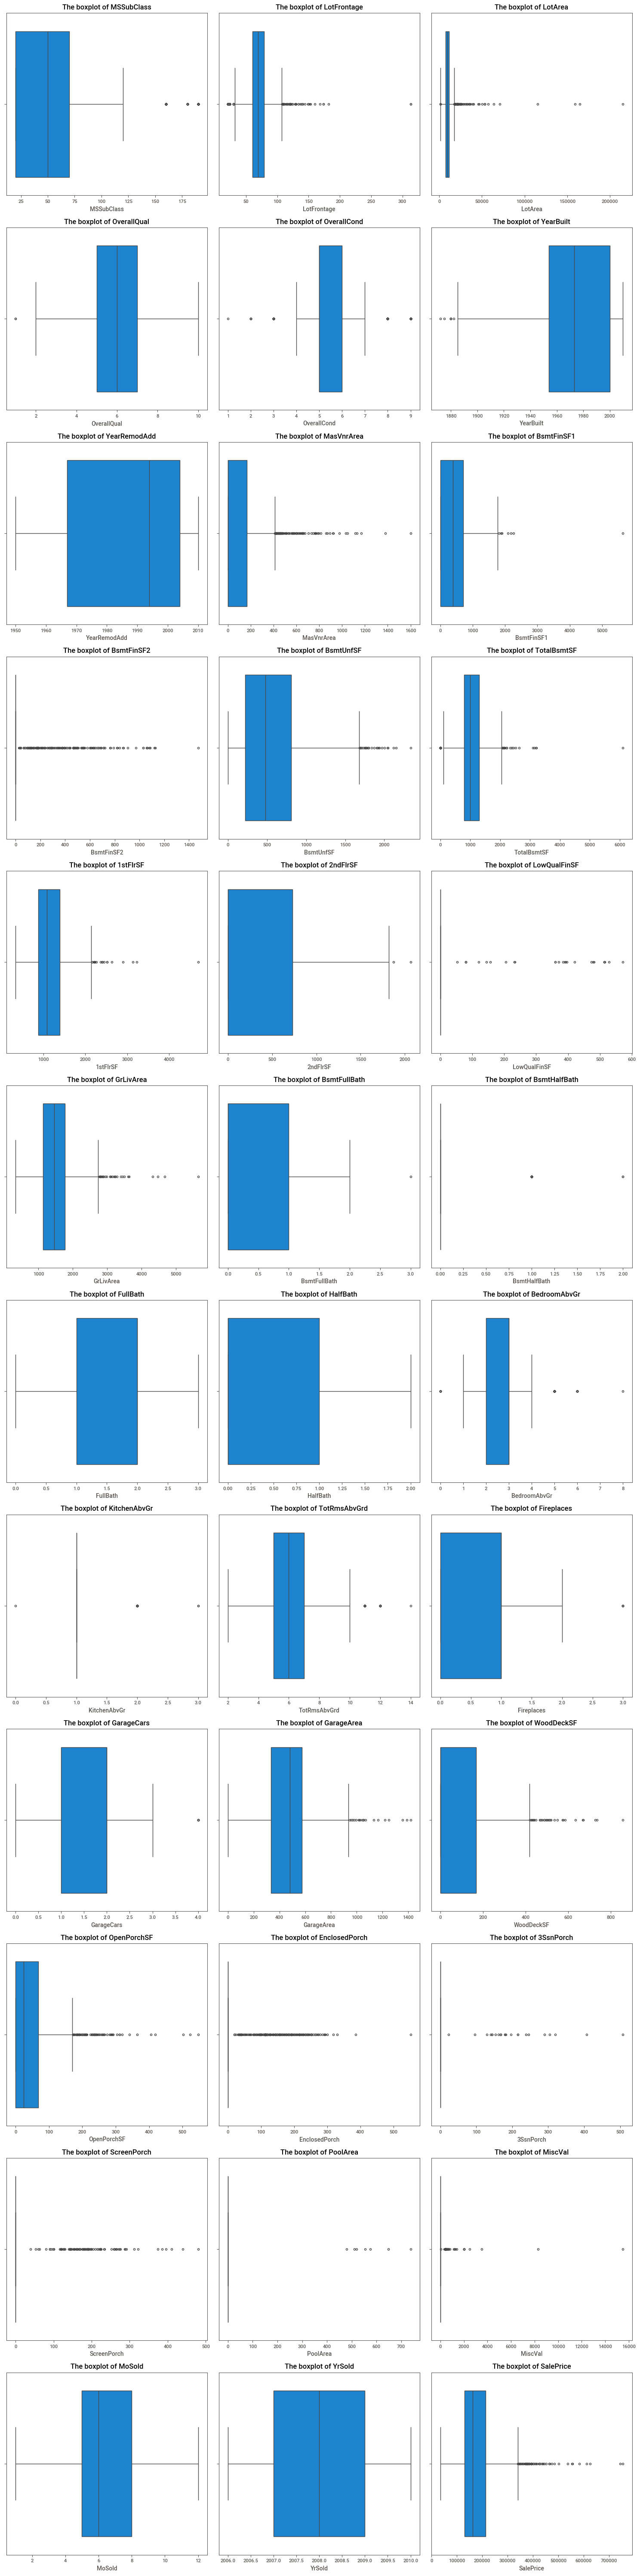

In [60]:
columns_to_plot = [col_name for col_name in data_new.select_dtypes(include=["int64","float64"]).columns]
num_cols = 3
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
for i, col_name in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(data=data_new, x=col_name, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'The boxplot of {col_name}')
    
num_features = len(columns_to_plot)
for i in range(num_features, num_rows*num_cols):
    axes.flatten()[i].axis('off')
plt.tight_layout()
plt.show()


as we checked before in EDA part about distribution, we've come into conclusion into using IOR for which we need to follow the steps below

1. find Q1 and Q3
2. IQR = Q3 - Q1
3. Find lower and upper limit
4. lower_limit = Q1 - 1.5 * IQR
5. upper_limit = Q3 + 1.5 * IQ6
6. Find the records/ values / datapoints greater than upper limit and less than lower(outliers)
7. find the percentage of outliers 
8. if the percentage is less than 10% then only we will handle the outliers
9. if the percenatge is greater the 10% then dont handle


In [61]:
numerical_columns = data_new.select_dtypes(include=["int64","float64"]).columns
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [62]:
for column in numerical_columns:
    # find Q1 and Q3
    Q1 = data_new[column].quantile(0.25)
    Q3 = data_new[column].quantile(0.75)

    #IQR
    IQR = Q3 - Q1

    # find lower and upper limit
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR


    # find the values that are outside of upper and lower limit
    outliers = data_new.loc[(data_new[column] > upper_limit) | (data_new[column] < lower_limit)]

    # get the percentage of outliers
    percent_outlier = (len(outliers)/ len(data_new))*100

    print(f'percentage outlier --> {column}: {percent_outlier}')

    if 0 < percent_outlier  <= 10:
        outliers = data_new[column].median()
        print("""
-------------------------------
              outlier handeled
              -------------------------
""")


percentage outlier --> MSSubClass: 7.054794520547945

-------------------------------
              outlier handeled
              -------------------------

percentage outlier --> LotFrontage: 7.260273972602739

-------------------------------
              outlier handeled
              -------------------------

percentage outlier --> LotArea: 4.726027397260274

-------------------------------
              outlier handeled
              -------------------------

percentage outlier --> OverallQual: 0.136986301369863

-------------------------------
              outlier handeled
              -------------------------

percentage outlier --> OverallCond: 8.561643835616438

-------------------------------
              outlier handeled
              -------------------------

percentage outlier --> YearBuilt: 0.4794520547945206

-------------------------------
              outlier handeled
              -------------------------

percentage outlier --> YearRemodAdd: 0.0
percentage 

### Scaling Data
Here we're going to scale the data which are continuos numerical variable

In [63]:
scalable_data = data_new[numerical_columns]
scalable_data

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0         706           0  ...           0   
1             1976         0.0         978           0  ...         298   
2             2002       162.0         486           0  ...           0   
3             1970         0.0         216           0  ...           0   
4             2000       350.0         655           0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...           0   
1456          1988       119.0         790         163  ...         349   
1457          2006         0.0         275           0  ...           0   
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 36 columns]

In [64]:
data_new['YearBuilt'] =data_new['YearBuilt'].astype('O')
data_new['YearRemodAdd'] = data_new['YearRemodAdd'].astype('O')
data_new['YrSold'] = data_new['YrSold'].astype('O')

In [65]:
numerical_columns = data_new.select_dtypes(include=["int64","float64"]).columns
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice'],
      dtype='object')

In [66]:
from sklearn.preprocessing import MinMaxScaler

scalable_data = data_new[numerical_columns]
scaler = MinMaxScaler()

data_new[numerical_columns] = scaler.fit_transform(scalable_data)
data_new


MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0       0.235294       RL     0.150685  0.033420   Pave      Reg         Lvl   
1       0.000000       RL     0.202055  0.038795   Pave      Reg         Lvl   
2       0.235294       RL     0.160959  0.046507   Pave      IR1         Lvl   
3       0.294118       RL     0.133562  0.038561   Pave      IR1         Lvl   
4       0.235294       RL     0.215753  0.060576   Pave      IR1         Lvl   
...          ...      ...          ...       ...    ...      ...         ...   
1455    0.235294       RL     0.140411  0.030929   Pave      Reg         Lvl   
1456    0.000000       RL     0.219178  0.055505   Pave      Reg         Lvl   
1457    0.294118       RL     0.154110  0.036187   Pave      Reg         Lvl   
1458    0.000000       RL     0.160959  0.039342   Pave      Reg         Lvl   
1459    0.000000       RL     0.184932  0.040370   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...      0.000000       0.0         0.0   
1       AllPub       FR2       Gtl  ...      0.000000       0.0         0.0   
2       AllPub    Inside       Gtl  ...      0.000000       0.0         0.0   
3       AllPub    Corner       Gtl  ...      0.492754       0.0         0.0   
4       AllPub       FR2       Gtl  ...      0.000000       0.0         0.0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...      0.000000       0.0         0.0   
1456    AllPub    Inside       Gtl  ...      0.000000       0.0         0.0   
1457    AllPub    Inside       Gtl  ...      0.000000       0.0         0.0   
1458    AllPub    Inside       Gtl  ...      0.202899       0.0         0.0   
1459    AllPub    Inside       Gtl  ...      0.000000       0.0         0.0   

     PoolArea  MiscVal    MoSold  YrSold SaleType SaleCondition SalePrice  
0         0.0  0.00000  0.090909    2008       WD        Normal  0.241078  
1         0.0  0.00000  0.363636    2007       WD        Normal  0.203583  
2         0.0  0.00000  0.727273    2008       WD        Normal  0.261908  
3         0.0  0.00000  0.090909    2006       WD       Abnorml  0.145952  
4         0.0  0.00000  1.000000    2008       WD        Normal  0.298709  
...       ...      ...       ...     ...      ...           ...       ...  
1455      0.0  0.00000  0.636364    2007       WD        Normal  0.194556  
1456      0.0  0.00000  0.090909    2010       WD        Normal  0.243161  
1457      0.0  0.16129  0.363636    2010       WD        Normal  0.321622  
1458      0.0  0.00000  0.272727    2010       WD        Normal  0.148903  
1459      0.0  0.00000  0.454545    2008       WD        Normal  0.156367  

[1460 rows x 75 columns]

In [67]:
data_new = 

SyntaxError: invalid syntax (4266290246.py, line 1)